#Loading and Cleaning the Main Data

In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pip install catboost

     |████████████████████████████████| 76.6 MB 1.3 MB/s 


In [ ]:
from collections import Counter
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost
import lightgbm
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/Project Dataset/

/content/drive/MyDrive/Project Dataset


In [ ]:
!ls

 catboost_info			      PCOS_infertility.csv
 PCOS_data_without_infertility.xlsx  'Project Survey.csv'


In [ ]:
#Loading Data
inf = pd.read_csv('PCOS_infertility.csv')
woinf = pd.read_excel('PCOS_data_without_infertility.xlsx', sheet_name= 'Full_new')

In [ ]:
# Looking at the data with infertile patients.

inf.head()

,Sl. No,Patient File No.,PCOS (Y/N),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),AMH(ng/mL)
0,1,10001,0,1.99,1.99,2.07
1,2,10002,0,60.80,1.99,1.53
2,3,10003,1,494.08,494.08,6.63
3,4,10004,0,1.99,1.99,1.22
4,5,10005,0,801.45,801.45,2.26


In [ ]:
# Looking at the data with non-infertile patients.

woinf.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 43
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


In [ ]:
#DATA PREPROCESSING
# Looking at the columns of data with non-infertile patients
inf.columns

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', '  I   beta-HCG(mIU/mL)',
       'II    beta-HCG(mIU/mL)', 'AMH(ng/mL)'],
      dtype='object')

In [ ]:
woinf.columns

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'Hip(inch)', 'Waist(inch)', 'Waist/Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
       'Unnamed: 43'],
      dtype='object')

In [ ]:
# Merging the two files as per patient file no.
# The files were sorted into two based on patients with infertility and without infertility

data = pd.merge(woinf,inf, on='Patient File No.', suffixes={'','_wo'},how='left')

In [ ]:
#Dropping the repeated features after merging.

data =data.drop(['Unnamed: 43', 'Sl. No_wo', 'PCOS (Y/N)_wo', '  I   beta-HCG(mIU/mL)_wo','II    beta-HCG(mIU/mL)_wo', 'AMH(ng/mL)_wo'], axis=1)

In [ ]:
# Changing the title of the properties.

data = data.rename(columns = {"PCOS (Y/N)":"Target"})

In [ ]:
# Looking at the merged data.

data.head()

,Sl. No,Patient File No.,Target,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


In [ ]:
# Dropping unnecessary features.

data = data.drop(["Sl. No","Patient File No."],axis = 1)

In [ ]:
data.info(verbose = True, null_counts = False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539 entries, 0 to 540
Data columns (total 41 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Target                  int64  
 1    Age (yrs)              int64  
 2   Weight (Kg)             float64
 3   Height(Cm)              float64
 4   BMI                     float64
 5   Blood Group             int64  
 6   Pulse rate(bpm)         int64  
 7   RR (breaths/min)        int64  
 8   Hb(g/dl)                float64
 9   Cycle(R/I)              int64  
 10  Cycle length(days)      int64  
 11  Marraige Status (Yrs)   float64
 12  Pregnant(Y/N)           int64  
 13  No. of aborptions       int64  
 14    I   beta-HCG(mIU/mL)  float64
 15  II    beta-HCG(mIU/mL)  object 
 16  FSH(mIU/mL)             float64
 17  LH(mIU/mL)              float64
 18  Hip(inch)               int64  
 19  Waist(inch)             int64  
 20  Waist/Hip Ratio         float64
 21  TSH (mIU/L)             float64
 22  AM

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.dropna(axis=0,how='any',inplace=True)

In [ ]:
data.isnull().sum()

Target                    0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     0
Pregnant(Y/N)             0
No. of aborptions         0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
Hip(inch)                 0
Waist(inch)               0
Waist/Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                0
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)           0
Reg.Exercise(Y/N)         0
BP _Systolic (mmHg)       0
BP _Diastolic (mmHg)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539 entries, 0 to 540
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Target                  539 non-null    int64  
 1    Age (yrs)              539 non-null    int64  
 2   Weight (Kg)             539 non-null    float64
 3   Height(Cm)              539 non-null    float64
 4   BMI                     539 non-null    float64
 5   Blood Group             539 non-null    int64  
 6   Pulse rate(bpm)         539 non-null    int64  
 7   RR (breaths/min)        539 non-null    int64  
 8   Hb(g/dl)                539 non-null    float64
 9   Cycle(R/I)              539 non-null    int64  
 10  Cycle length(days)      539 non-null    int64  
 11  Marraige Status (Yrs)   539 non-null    float64
 12  Pregnant(Y/N)           539 non-null    int64  
 13  No. of aborptions       539 non-null    int64  
 14    I   beta-HCG(mIU/mL)  539 non-null    fl

In [ ]:
data.describe()

,Target,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,...,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000
mean,0.326531,31.430427,59.637291,156.471792,24.315408,13.801484,73.252319,19.237477,11.161558,2.554731,...,0.491651,0.515770,0.246753,114.641929,76.935065,6.116883,6.643785,15.018182,15.449666,8.472115
std,0.469380,5.414105,11.041874,6.039703,4.061713,1.843182,4.437858,1.687260,0.868019,0.899334,...,0.500395,0.500215,0.431522,7.391079,5.574892,4.223240,4.444538,3.565130,3.319807,2.166571
min,0.000000,20.000000,31.000000,137.000000,12.417882,11.000000,13.000000,16.000000,8.500000,2.000000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,28.000000,52.000000,152.000000,21.674599,13.000000,72.000000,18.000000,10.500000,2.000000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,0.000000,31.000000,59.000000,156.000000,24.238227,14.000000,72.000000,18.000000,11.000000,2.000000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,1.000000,35.000000,65.000000,160.000000,26.650813,15.000000,74.000000,20.000000,11.750000,4.000000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,14.800000,5.000000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


In [ ]:
# Having a look at the data with dtype objects.

data["AMH(ng/mL)"].head() 

0    2.07
1    1.53
2    6.63
3    1.22
4    2.26
Name: AMH(ng/mL), dtype: object

In [ ]:
# Similarly,

data["II    beta-HCG(mIU/mL)"].head()

0      1.99
1      1.99
2    494.08
3      1.99
4    801.45
Name: II    beta-HCG(mIU/mL), dtype: object

In [ ]:
#Dealing with categorical values.
# In this database the type objects are numeric values saved as strings.
# So I am just converting it into a numeric value.

data["AMH(ng/mL)"] = pd.to_numeric(data["AMH(ng/mL)"], errors='coerce')

data["II    beta-HCG(mIU/mL)"] = pd.to_numeric(data["II    beta-HCG(mIU/mL)"], errors='coerce')

In [ ]:
# Dealing with missing values. 
# Filling NA values with the median of that feature.

data['Marraige Status (Yrs)'].fillna(data['Marraige Status (Yrs)'].median(),inplace=True)

data['II    beta-HCG(mIU/mL)'].fillna(data['II    beta-HCG(mIU/mL)'].median(),inplace=True)

data['AMH(ng/mL)'].fillna(data['AMH(ng/mL)'].median(),inplace=True)

data['Fast food (Y/N)'].fillna(data['Fast food (Y/N)'].median(),inplace=True)

In [ ]:
# Clearing up the extra space in the column names.

data.columns = [col.strip() for col in data.columns]

In [ ]:
#Variable Description
colors = ['#670067','#008080']

In [ ]:
#Categoral Variable

def bar_plot(variable):
    """
     input: variable example : Target
     output: bar plot & value count
     
    """
    # Get feature
    var = data[variable]
    # Count number of categorical variable(value/sample)
    varValue = var.value_counts()
    # Visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index,varValue,color=colors)
    plt.xticks(varValue.index,varValue.index.values)
    plt.ylabel("Count")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

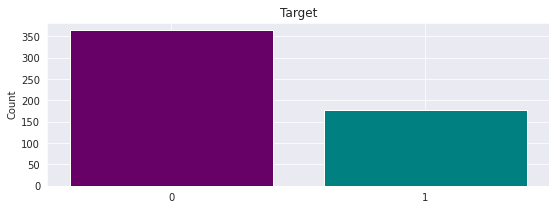

Target: 
 0    364
1    177
Name: Target, dtype: int64


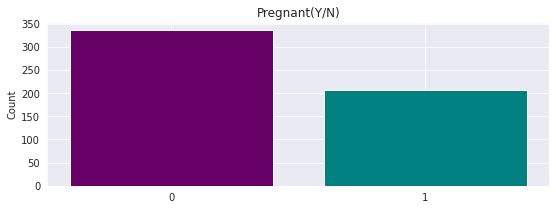

Pregnant(Y/N): 
 0    335
1    206
Name: Pregnant(Y/N), dtype: int64


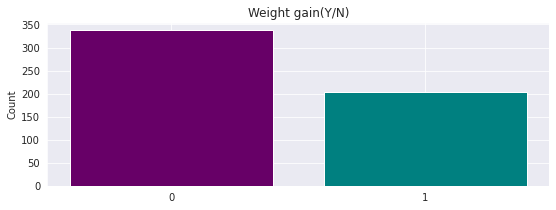

Weight gain(Y/N): 
 0    337
1    204
Name: Weight gain(Y/N), dtype: int64


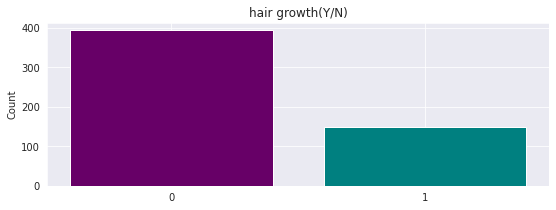

hair growth(Y/N): 
 0    393
1    148
Name: hair growth(Y/N), dtype: int64


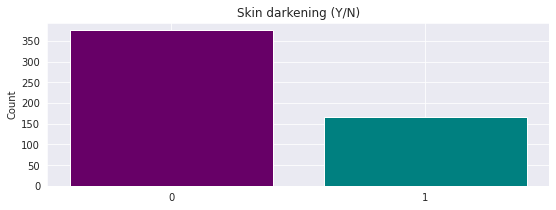

Skin darkening (Y/N): 
 0    375
1    166
Name: Skin darkening (Y/N), dtype: int64


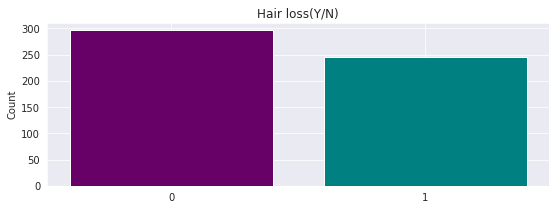

Hair loss(Y/N): 
 0    296
1    245
Name: Hair loss(Y/N), dtype: int64


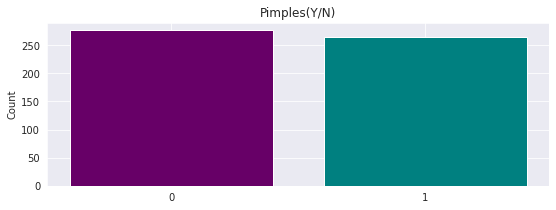

Pimples(Y/N): 
 0    276
1    265
Name: Pimples(Y/N), dtype: int64


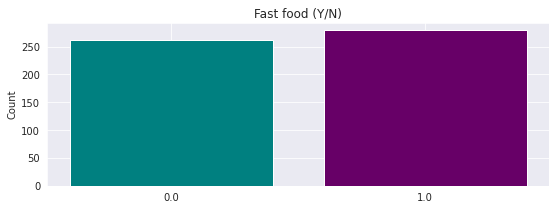

Fast food (Y/N): 
 1.0    279
0.0    262
Name: Fast food (Y/N), dtype: int64


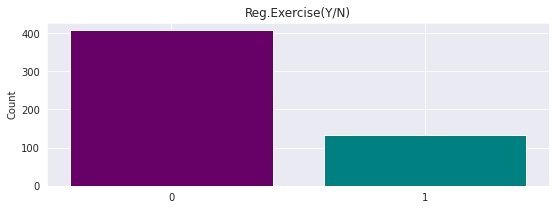

Reg.Exercise(Y/N): 
 0    407
1    134
Name: Reg.Exercise(Y/N), dtype: int64


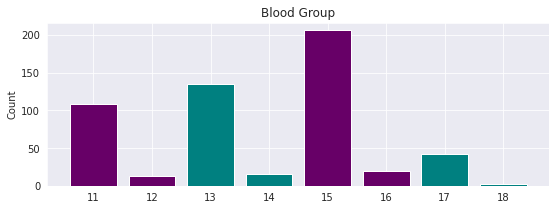

Blood Group: 
 15    206
13    135
11    108
17     42
16     19
14     16
12     13
18      2
Name: Blood Group, dtype: int64


In [ ]:
category = ["Target", "Pregnant(Y/N)", "Weight gain(Y/N)", "hair growth(Y/N)", "Skin darkening (Y/N)", "Hair loss(Y/N)", "Pimples(Y/N)", "Fast food (Y/N)", "Reg.Exercise(Y/N)", "Blood Group"]
for c in category:
    bar_plot(c)

In [ ]:
#Numerical Variable

def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(data[variable], bins = 50,color=colors[1])
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

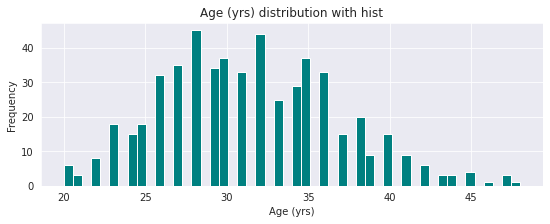

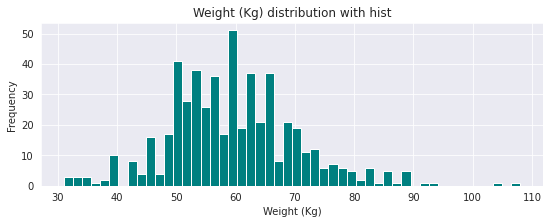

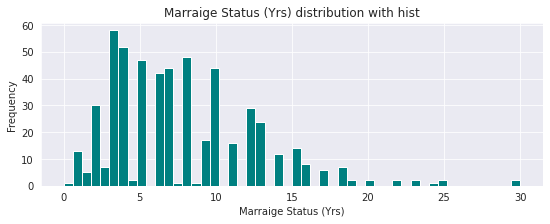

In [ ]:
numericVar = ["Age (yrs)", "Weight (Kg)","Marraige Status (Yrs)"]
for n in numericVar:
    plot_hist(n)

In [ ]:
#EXPLORATORY DATA ANALYSIS (EDA)

# Having a look at some basic statistical details.

data.describe()

,Target,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,...,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,0.327172,31.430684,59.637153,156.484835,24.311285,13.802218,73.247689,19.243993,11.160037,2.560074,...,0.489834,0.515712,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915
std,0.469615,5.411006,11.028287,6.033545,4.056399,1.840812,4.430285,1.688629,0.866904,0.901950,...,0.500359,0.500216,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381
min,0.000000,20.000000,31.000000,137.000000,12.417882,11.000000,13.000000,16.000000,8.500000,2.000000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,28.000000,52.000000,152.000000,21.641274,13.000000,72.000000,18.000000,10.500000,2.000000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,0.000000,31.000000,59.000000,156.000000,24.238227,14.000000,72.000000,18.000000,11.000000,2.000000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,1.000000,35.000000,65.000000,160.000000,26.634958,15.000000,74.000000,20.000000,11.700000,4.000000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,14.800000,5.000000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


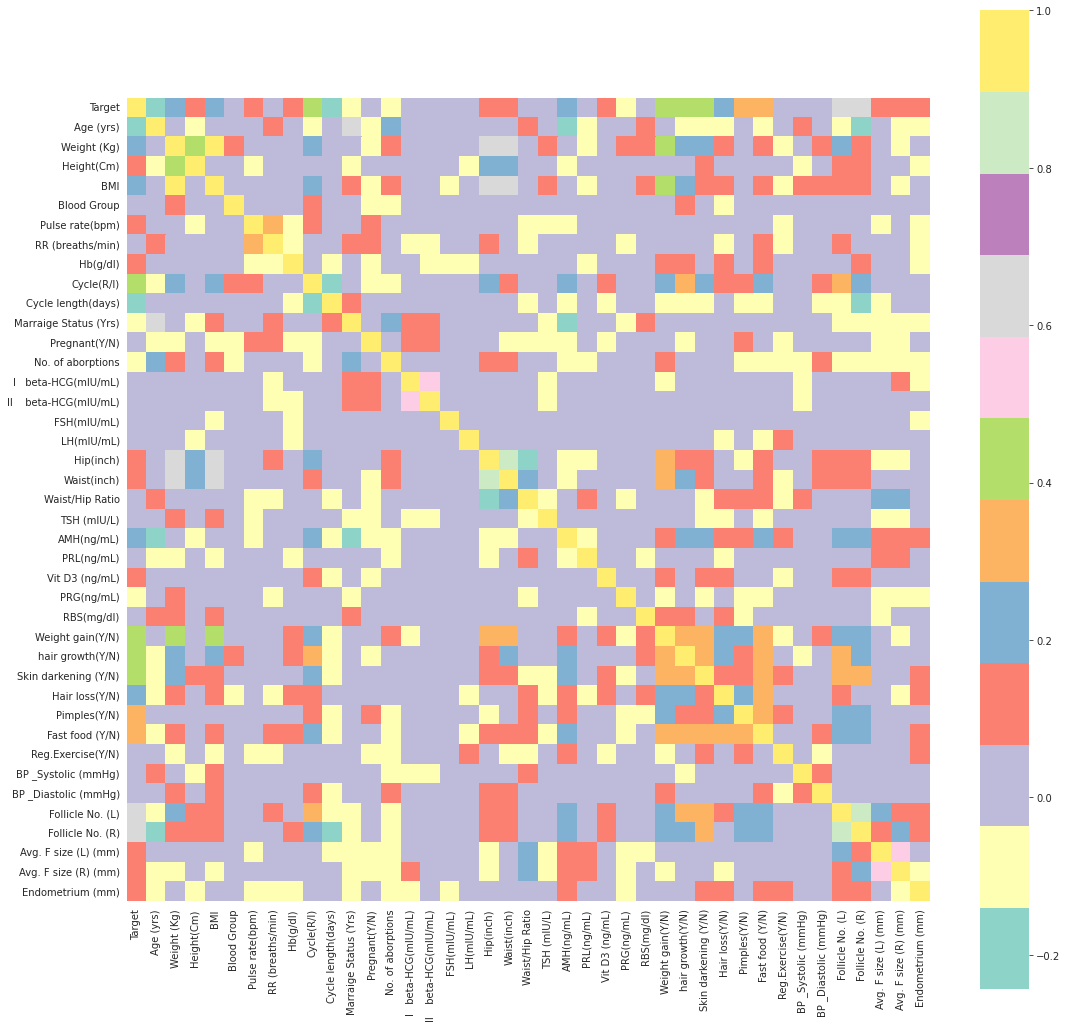

In [ ]:
# Examaning a correlation matrix of all the features.

corrmat = data.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap="Set3", square=True);

In [ ]:
# How all the features correlate with the PCOS. 

corrmat['Target'].sort_values(ascending=False)

Target                    1.000000
Follicle No. (R)          0.648327
Follicle No. (L)          0.603346
Skin darkening (Y/N)      0.475733
hair growth(Y/N)          0.464667
Weight gain(Y/N)          0.441047
Cycle(R/I)                0.401644
Fast food (Y/N)           0.376183
Pimples(Y/N)              0.286077
AMH(ng/mL)                0.264141
Weight (Kg)               0.211938
BMI                       0.199534
Hair loss(Y/N)            0.172879
Waist(inch)               0.164598
Hip(inch)                 0.162297
Avg. F size (L) (mm)      0.132992
Endometrium (mm)          0.106648
Avg. F size (R) (mm)      0.097690
Pulse rate(bpm)           0.091821
Hb(g/dl)                  0.087170
Vit D3 (ng/mL)            0.085494
Height(Cm)                0.068254
Reg.Exercise(Y/N)         0.065337
LH(mIU/mL)                0.063879
RBS(mg/dl)                0.048922
BP _Diastolic (mmHg)      0.038032
RR (breaths/min)          0.036928
Blood Group               0.036433
II    beta-HCG(mIU/m

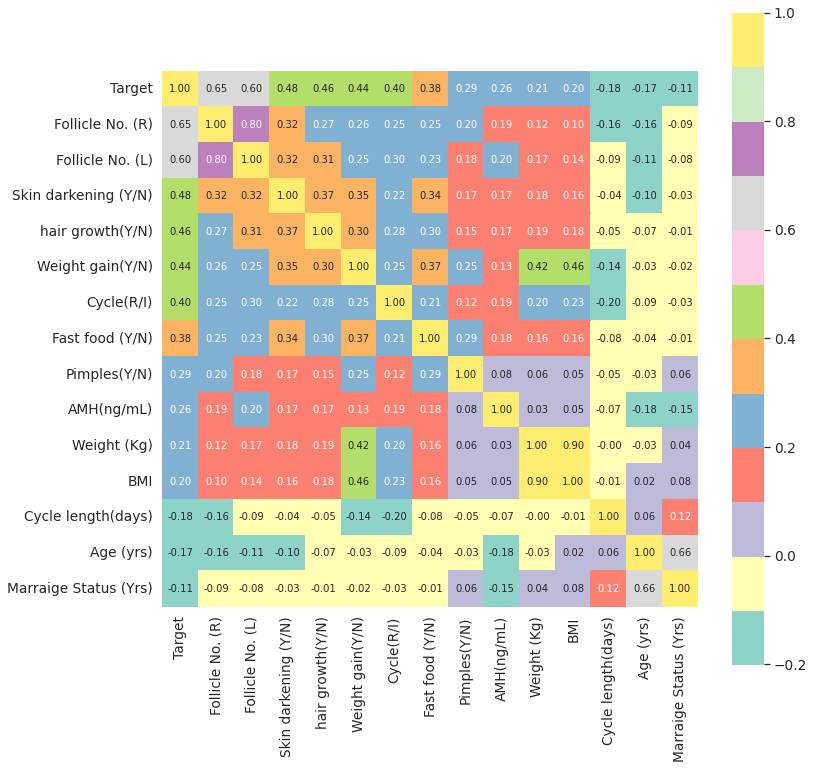

In [ ]:
# Having a look at features bearing significant correlation.

plt.figure(figsize=(12,12))
k = 12 #number of variables with positive for heatmap
l = 3 #number of variables with negative for heatmap
cols_p = corrmat.nlargest(k,'Target')['Target'].index 
cols_n = corrmat.nsmallest(l, 'Target')['Target'].index
cols = cols_p.append(cols_n) 

cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True,cmap="Set3", annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
data.corr()

,Target,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
Target,1.000000,-0.168513,0.211938,0.068254,0.199534,0.036433,0.091821,0.036928,0.087170,0.401644,...,0.286077,0.376183,0.065337,0.007942,0.038032,0.603346,0.648327,0.132992,0.097690,0.106648
Age (yrs),-0.168513,1.000000,-0.029734,-0.119819,0.021261,-0.010954,0.045831,0.087382,-0.021558,-0.085943,...,-0.032921,-0.039108,-0.025911,0.073587,0.066788,-0.110793,-0.159395,-0.016352,-0.079250,-0.104238
Weight (Kg),0.211938,-0.029734,1.000000,0.420098,0.901675,0.072682,0.019983,0.043614,0.009594,0.200758,...,0.063983,0.160774,-0.068236,0.027608,0.131402,0.173751,0.124290,-0.021368,-0.073207,-0.010100
Height(Cm),0.068254,-0.119819,0.420098,1.000000,-0.006878,0.040825,-0.074339,-0.029459,0.024378,-0.017336,...,0.061129,0.032839,0.012943,-0.067959,0.011116,0.106189,0.075358,-0.026705,0.059426,-0.054035
BMI,0.199534,0.021261,0.901675,-0.006878,1.000000,0.061939,0.050529,0.061905,0.003512,0.232828,...,0.045656,0.157726,-0.080192,0.069491,0.139975,0.142886,0.104204,-0.011610,-0.111522,0.009349
Blood Group,0.036433,-0.010954,0.072682,0.040825,0.061939,1.000000,0.047572,-0.023766,-0.001759,0.123724,...,0.039029,-0.035836,0.064035,0.030898,0.054014,0.061332,0.013974,-0.035667,-0.015725,-0.015335
Pulse rate(bpm),0.091821,0.045831,0.019983,-0.074339,0.050529,0.047572,1.000000,0.303804,-0.052048,0.101006,...,-0.003039,0.059242,-0.038881,-0.025510,0.007623,0.040390,0.049182,-0.048356,-0.034202,-0.041241
RR (breaths/min),0.036928,0.087382,0.043614,-0.029459,0.061905,-0.023766,0.303804,1.000000,-0.040487,0.018324,...,0.029242,0.137957,-0.047451,0.017323,0.052631,0.069731,0.012441,-0.031051,-0.021893,-0.063930
Hb(g/dl),0.087170,-0.021558,0.009594,0.024378,0.003512,-0.001759,-0.052048,-0.040487,1.000000,0.036683,...,0.053794,0.074818,0.011643,0.053020,0.000606,0.061195,0.072958,0.032617,0.024335,-0.066446
Cycle(R/I),0.401644,-0.085943,0.200758,-0.017336,0.232828,0.123724,0.101006,0.018324,0.036683,1.000000,...,0.121380,0.208263,-0.004989,0.054910,0.081345,0.296518,0.251575,0.033450,0.016007,0.043614


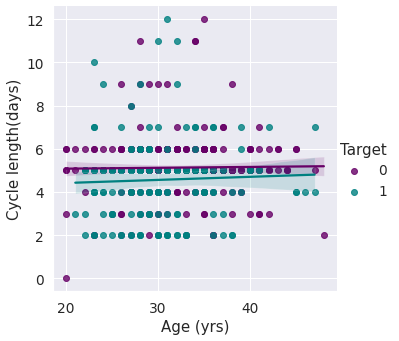

In [ ]:
#Patterns Of Length Of The Menstrual Cycle
# Length of menstrual phase in PCOS vs normal 

fig=sns.lmplot(data=data,x="Age (yrs)",y="Cycle length(days)", hue="Target",palette=colors)
plt.show(fig)


#The length of the menstrual phase is overall consistent over different ages for normal cases. Whereas in the case of PCOD the length increased with age.

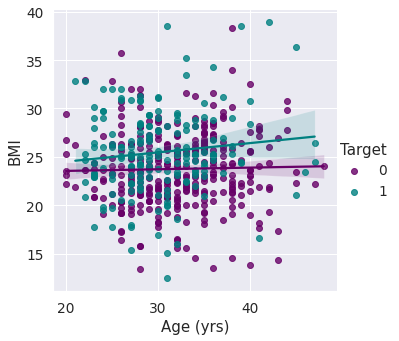

In [ ]:
#Patterns Of BMI

# Pattern of weight gain (BMI) over years in PCOS and Normal. 

fig= sns.lmplot(data =data,x="Age (yrs)",y="BMI", hue="Target", palette= colors )
plt.show(fig)

#Body mass index (BMI) is showing consistency for normal cases. Whereas for PCOS the BMI increases with age.

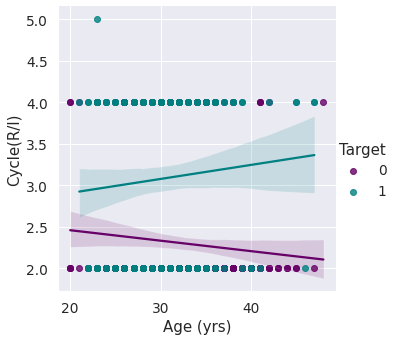

In [ ]:
'''Patterns Of Irregularity In Mensuration
Apparently in the feature "Cycle(R/I)" value:

4 indicates irregular menstrual cycle

2 indicates a regular menstrual cycle'''

# Cycle IR wrt age 

sns.lmplot(data =data,x="Age (yrs)",y="Cycle(R/I)", hue="Target",palette=colors)
plt.show()

#The mensural cycle becomes more regular for normal cases with age. Whereas, for PCOS the irregularity increases with age.

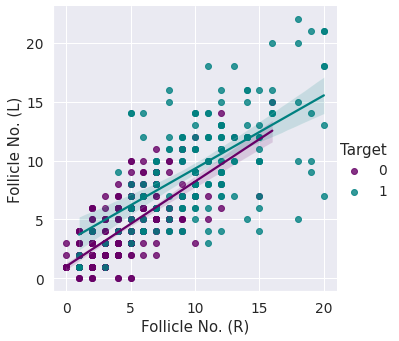

In [ ]:
#Number Of Follicles

# Distribution of follicles in both ovaries.

sns.lmplot(data =data,x='Follicle No. (R)',y='Follicle No. (L)', hue="Target",palette=colors)
plt.show()

#The distribution of follicles in both ovaries Left and Right are not equal for women with PCOS in comparison with the "Normal" patient.

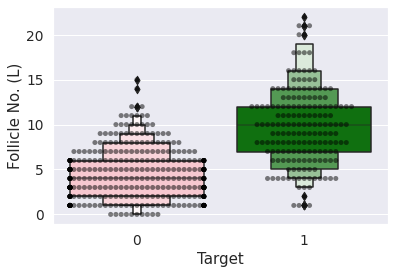

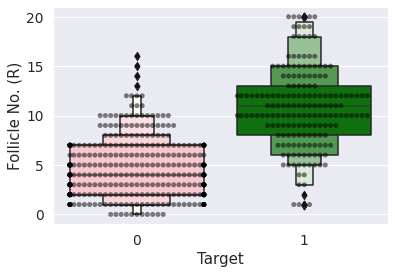

In [ ]:
# Exploring the above observation with the help of Boxplot

color = ["pink", "green"]
features = ["Follicle No. (L)","Follicle No. (R)"]
for i in features:
    sns.swarmplot(x=data["Target"], y=data[i], color="black", alpha=0.5 )
    sns.boxenplot(x=data["Target"], y=data[i], palette=color)
    plt.show()

    #The number of follicles in women with PCOS is higher, as expected. And are unequal as well.

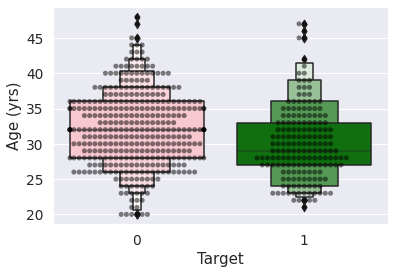

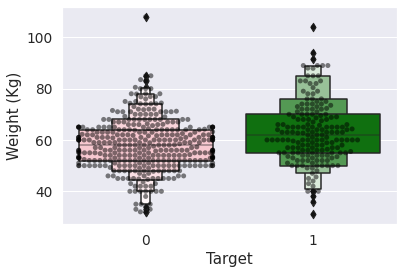

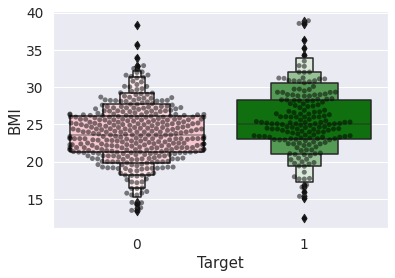

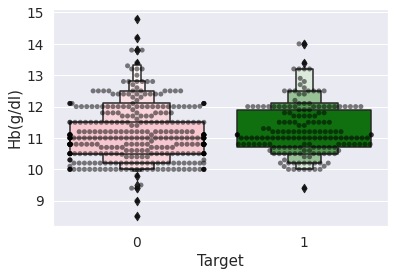

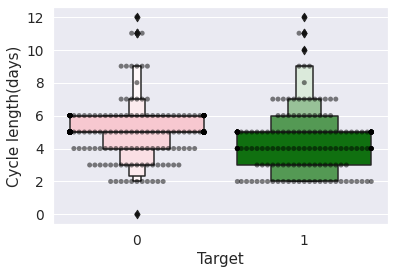

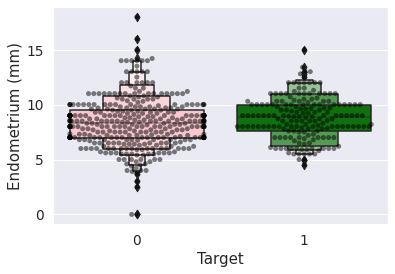

In [ ]:
#Some Miscellaneous EDA

features = ["Age (yrs)","Weight (Kg)", "BMI", "Hb(g/dl)", "Cycle length(days)","Endometrium (mm)" ]
for i in features:
    sns.swarmplot(x=data["Target"], y=data[i], color="black", alpha=0.5 )
    sns.boxenplot(x=data["Target"], y=data[i], palette=color)
    plt.show()

In [ ]:
#DATA MODELING

#Train - Test Split

#Assiging the features (X)and target(y).

X= data.drop(labels = ["Target"],axis = 1)
y=data.Target


In [ ]:
#Splitting the data into test and training sets.

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [ ]:
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))

X_train 378
X_test 163
y_train 378
y_test 163


In [ ]:
#Simple Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
acc_log_train = round(logreg.score(X_train, y_train)*100,2) 
acc_log_test = round(logreg.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Testing Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 89.15
Testing Accuracy: % 83.44


In [ ]:
'''Grid Search
Here, taking 5 Machine Learning classifiers and evaluating the mean accuracy of each of them by stratified cross validation.

Decision Tree
SVM
Random Forest
KNN
Logistic Regression'''


random_state = 42
classifier = [DecisionTreeClassifier(random_state = random_state),
             SVC(random_state = random_state),
             RandomForestClassifier(random_state = random_state),
             LogisticRegression(random_state = random_state),
             KNeighborsClassifier()]

# Decision Tree
dt_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}

# SVM
svc_param_grid = {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [1,10,50,100,200,300,1000]}

# Random Forest
rf_param_grid = {"max_features": ['auto', 'sqrt', 'log2'],
                "n_estimators":[300,500],
                "criterion":["gini"],
                'max_depth' : [4,5,6,7,8,9,10,12],}

# Logistic Regression
logreg_param_grid = {"C":np.logspace(-3,3,7),
                    "penalty": ["l1","l2"]}

# KNN
knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}


classifier_param = [dt_param_grid,
                   svc_param_grid,
                   rf_param_grid,
                   logreg_param_grid,
                   knn_param_grid]

In [ ]:
cv_result = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid=classifier_param[i], cv = StratifiedKFold(n_splits = 10),
                       scoring = "accuracy", n_jobs = -1,verbose = 1)
    clf.fit(X_train,y_train)
    cv_result.append(round(clf.best_score_*100,2))
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 10 folds for each of 250 candidates, totalling 2500 fits
84.12
Fitting 10 folds for each of 28 candidates, totalling 280 fits
71.96
Fitting 10 folds for each of 48 candidates, totalling 480 fits
89.94
Fitting 10 folds for each of 14 candidates, totalling 140 fits
87.3
Fitting 10 folds for each of 40 candidates, totalling 400 fits
75.39


In [ ]:
best_estimators

[DecisionTreeClassifier(max_depth=3, min_samples_split=50, random_state=42),
 SVC(C=1, gamma=0.001, random_state=42),
 RandomForestClassifier(max_depth=8, max_features='log2', n_estimators=300,
                        random_state=42),
 LogisticRegression(C=1000.0, random_state=42),
 KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='distance')]

In [ ]:
dt = best_estimators[0]
svm = best_estimators[1]
rf = best_estimators[2]
lr = best_estimators[3]
knn = best_estimators[4]

In [ ]:
#XGBRF and CatBoost

# XGBRF Classifier
xgb_clf = xgboost.XGBRFClassifier(max_depth=3, random_state=random_state)
xgb_clf.fit(X_train,y_train)
acc_xgb_clf_train = round(xgb_clf.score(X_train, y_train)*100,2) 
acc_xgb_clf_test = round(xgb_clf.score(X_test,y_test)*100,2)
cv_result.append(acc_xgb_clf_train)
print("Training Accuracy: % {}".format(acc_xgb_clf_train))
print("Testing Accuracy: % {}".format(acc_xgb_clf_test))

Training Accuracy: % 91.01
Testing Accuracy: % 87.73


In [ ]:
# CatBoost Classifier
cat_clf = CatBoostClassifier()
cat_clf.fit(X_train,y_train)
acc_cat_clf_train = round(cat_clf.score(X_train, y_train)*100,2) 
acc_cat_clf_test = round(cat_clf.score(X_test,y_test)*100,2)
cv_result.append(acc_cat_clf_train)
print("Training Accuracy: % {}".format(acc_cat_clf_train))
print("Testing Accuracy: % {}".format(acc_cat_clf_test))

Learning rate set to 0.0068
0:	learn: 0.6884445	total: 51ms	remaining: 51s
1:	learn: 0.6820632	total: 54.7ms	remaining: 27.3s
2:	learn: 0.6774626	total: 58.2ms	remaining: 19.4s
3:	learn: 0.6728246	total: 61.9ms	remaining: 15.4s
4:	learn: 0.6669962	total: 65.4ms	remaining: 13s
5:	learn: 0.6626918	total: 69ms	remaining: 11.4s
6:	learn: 0.6587703	total: 72.9ms	remaining: 10.3s
7:	learn: 0.6519749	total: 76.4ms	remaining: 9.48s
8:	learn: 0.6468578	total: 80.1ms	remaining: 8.82s
9:	learn: 0.6415308	total: 84ms	remaining: 8.31s
10:	learn: 0.6357537	total: 87.7ms	remaining: 7.88s
11:	learn: 0.6305012	total: 91.4ms	remaining: 7.52s
12:	learn: 0.6247041	total: 95.2ms	remaining: 7.22s
13:	learn: 0.6207323	total: 98.8ms	remaining: 6.96s
14:	learn: 0.6160446	total: 102ms	remaining: 6.72s
15:	learn: 0.6110927	total: 106ms	remaining: 6.51s
16:	learn: 0.6066879	total: 110ms	remaining: 6.33s
17:	learn: 0.6031712	total: 113ms	remaining: 6.17s
18:	learn: 0.5982091	total: 117ms	remaining: 6.02s
19:	learn

In [ ]:
#RESULT
#Showing the model, accuracy and confusion matrix.

model_list = ['Decision Tree','SVC','RandomForest','Logistic Regression','KNearestNeighbours','XGBRF','CatBoostClassifier']

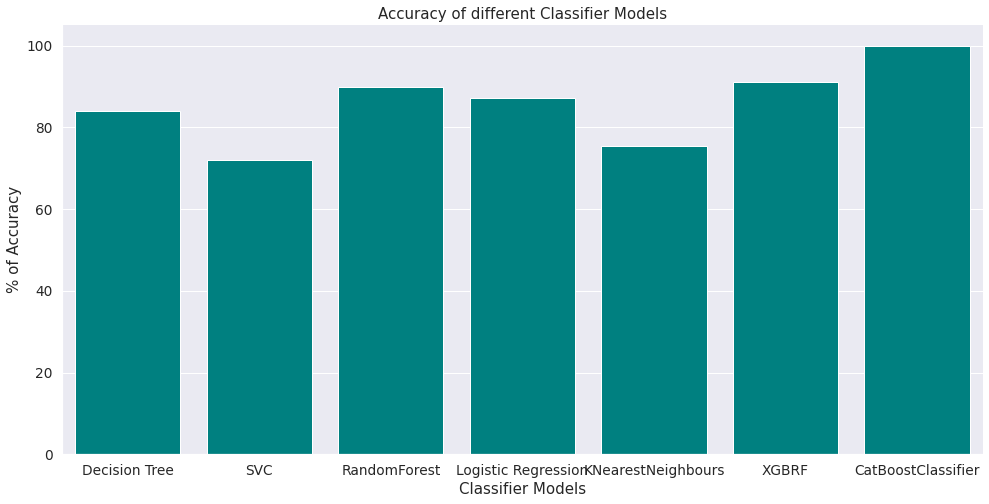

In [ ]:
fg = sns.factorplot(x = model_list, y = cv_result, size= 7, aspect=2 ,color= colors[1], saturation=5,kind='bar', data=data)
plt.title('Accuracy of different Classifier Models')
plt.xlabel('Classifier Models')
plt.ylabel('% of Accuracy')

plt.show()

In [ ]:
# Plotly Bar Chart:

import plotly.graph_objects as go
trace1 = go.Bar(
                x = model_list,
                y = cv_result,
                marker = dict(color = 'rgb(32, 155, 110)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(title = 'Accuracy of different Classifier Models' , xaxis = dict(title = 'Classifier Models'), yaxis = dict(title = '% of Accuracy'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

In [ ]:
model = [dt,svm,rf,lr,knn,xgb_clf,cat_clf]
predictions = []

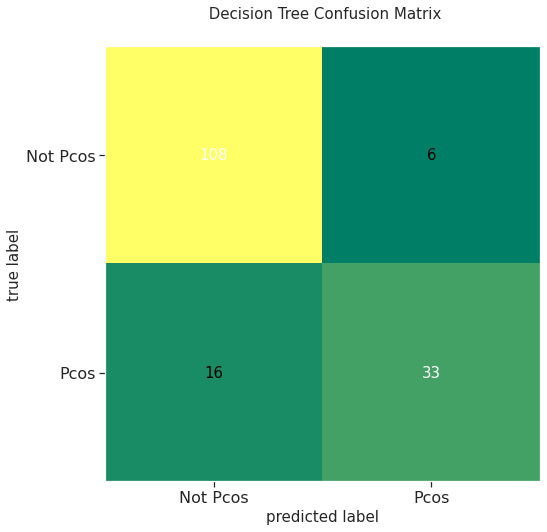

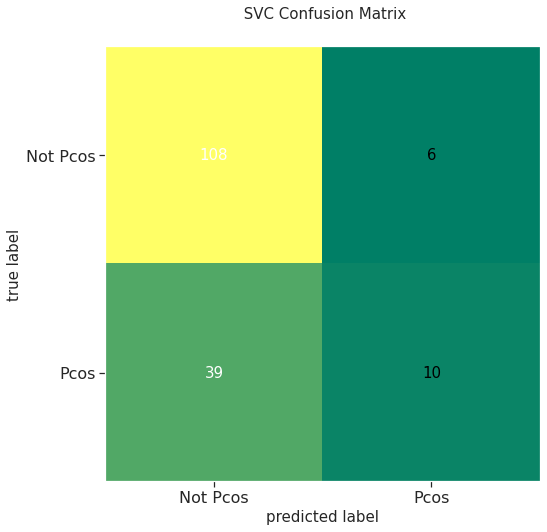

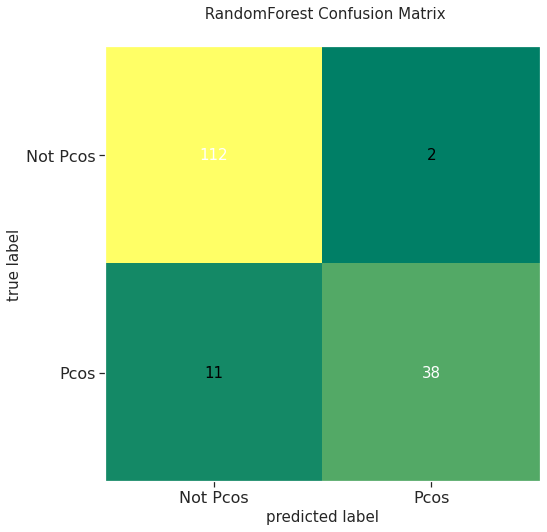

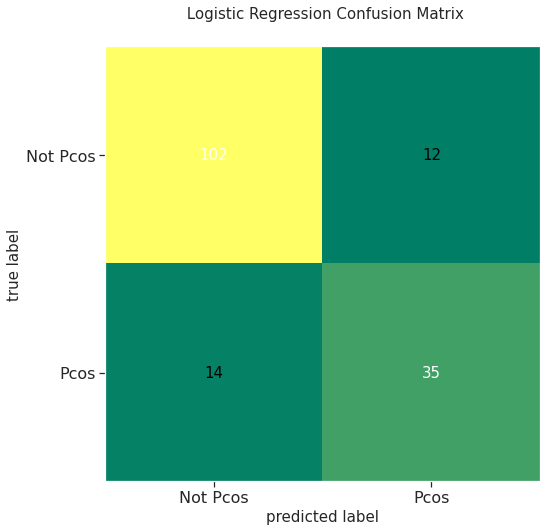

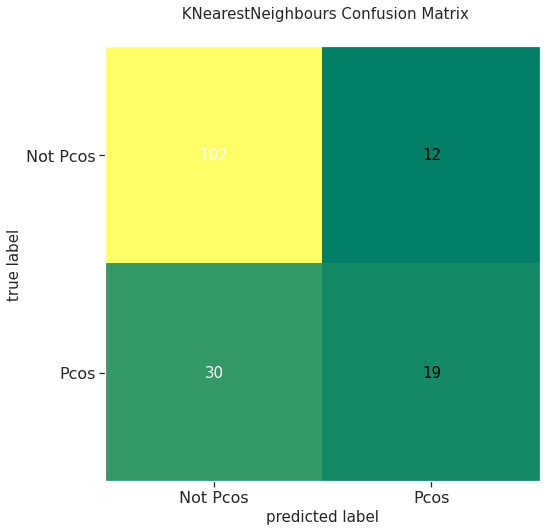

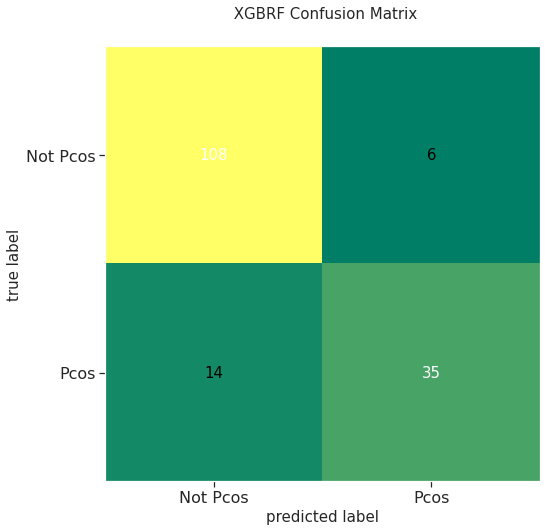

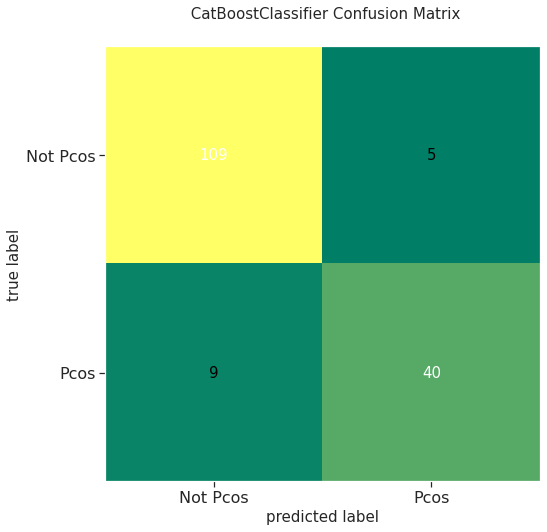

In [ ]:
for i in model:
    predictions.append(i.predict(X_test))
for j in range(7):
    cm = confusion_matrix(y_test, predictions[j])
    plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.summer)
    plt.title(" {} Confusion Matrix".format(model_list[j]))
    plt.xticks(range(2), ["Not Pcos","Pcos"], fontsize=16)
    plt.yticks(range(2), ["Not Pcos","Pcos"], fontsize=16)
    plt.show()

#Loading and Cleaning the Survey Data


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn import svm
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score,precision_score
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,roc_curve, auc
%matplotlib inline

In [ ]:
data = pd.read_csv('Project Survey.csv')

In [ ]:
data

,Timestamp,Q.1 What is Your age?,Q.2 Have you ever been Pregnant or had Abortions?,Q.3 Do you Exercise Regularly?,Q.4 How much is your weight and height?,Q.5 Do you eat junk-food on daily basis?,Q.6 Do you Sleep well?,Q.7 Do you have major facial growth?,Q.8 Are you facing with Hair loss?,Q.9 Are you facing problem with weight gain or weight loss?,Q.10 Do you get too upset or depressed/stressed during your monthly cycle?,Q.11 When did you get your first Menstrual Cycle?,Q.12 What are/were the challenges did you face with PCOS?,Q.13 Are you taking any treatment for PCOS?,Q.14 Are you facing problem with irregular periods and weight loss/gain and acne?,Q.15 Are you diagnosed with any other health issues when you were/are diagnosed with PCOS?
0,2022/01/17 11:48:04 AM GMT+5:30,22,No,No,"40-50(weight), 4-4.5(height)",No,Yes,No,Yes,Yes,Yes,At Old Age,None of the above,No,No,No
1,2022/01/17 12:00:31 PM GMT+5:30,53,No,Yes,"60-70(weight), 5.5-6.0(height)",No,Yes,No,Yes,No,Yes,At Early Age,Irregular Periods,Yes,Yes,No
2,2022/01/17 12:04:39 PM GMT+5:30,22,None,Yes,"50-60(weight), 4.5-5.5(height)",No,No,No,Yes,No,No,At Old Age,None of the above,No,No,No
3,2022/01/17 12:05:53 PM GMT+5:30,22,Yes,No,"50-60(weight), 4.5-5.5(height)",No,No,Yes,No,Yes,Yes,At Old Age,Irregular Periods;Problems with Sleep,Yes,Yes,No
4,2022/01/17 12:18:05 PM GMT+5:30,22,No,Yes,"40-50(weight), 4-4.5(height)",No,Yes,No,No,Yes,No,At Early Age,None of the above,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,2022/05/01 5:56:13 PM GMT+5:30,24,None,No,"50-60(weight), 4.5-5.5(height)",No,Yes,No,Yes,No,No,At Old Age(Above 12 Yrs),Weight Issue(GAIN/LOSS),No,No,No
66,2022/05/01 5:58:19 PM GMT+5:30,15,No,Yes,"40-50(weight), 4-4.5(height)",No,Yes,Yes,No,No,No,At Early Age(Below 11 Yrs),Irregular Periods;Facial Growth;Acne Problem,No,Yes,No
67,2022/05/01 6:09:59 PM GMT+5:30,23,No,No,"50-60(weight), 4.5-5.5(height)",No,No,No,No,No,No,At Old Age(Above 12 Yrs),None of the above,No,No,No
68,2022/05/01 6:31:52 PM GMT+5:30,21,No,Yes,"60-70(weight), 5.5-6.0(height)",No,Yes,No,Yes,Yes,Yes,At Old Age(Above 12 Yrs),Irregular Periods;Weight Issue(GAIN/LOSS),No,Yes,No


###Details of Dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 16 columns):
 #   Column                                                                                      Non-Null Count  Dtype 
---  ------                                                                                      --------------  ----- 
 0   Timestamp                                                                                   70 non-null     object
 1   Q.1 What is Your age?                                                                       70 non-null     object
 2   Q.2 Have you ever been Pregnant or had Abortions?                                           70 non-null     object
 3   Q.3 Do you Exercise Regularly?                                                              70 non-null     object
 4   Q.4 How much is your weight and height?                                                     70 non-null     object
 5   Q.5 Do you eat junk-food on daily basis?            

###NO. OF ROWS & COLUMNS IN DATASET

In [ ]:
data.shape

(70, 16)

###COLUMNS NAMES

In [ ]:
data.columns

Index(['Timestamp', 'Q.1 What is Your age?',
       'Q.2 Have you ever been Pregnant or had Abortions?',
       'Q.3 Do you Exercise Regularly?',
       'Q.4 How much is your weight and height?',
       'Q.5 Do you eat junk-food on daily basis?', 'Q.6 Do you Sleep well?',
       'Q.7 Do you have major facial growth?',
       'Q.8 Are you facing with Hair loss?',
       'Q.9 Are you facing problem with weight gain or weight loss?',
       'Q.10 Do you get too upset or depressed/stressed during your monthly cycle?',
       'Q.11 When did you get your first Menstrual Cycle?',
       'Q.12 What are/were the challenges did you face with PCOS?',
       'Q.13 Are you taking any treatment for PCOS? ',
       'Q.14 Are you facing problem with irregular periods and weight loss/gain and acne?',
       'Q.15 Are you diagnosed with any other health issues when you were/are diagnosed with PCOS?'],
      dtype='object')

###Datatype of Columns

In [ ]:
data.dtypes

Timestamp                                                                                     object
Q.1 What is Your age?                                                                         object
Q.2 Have you ever been Pregnant or had Abortions?                                             object
Q.3 Do you Exercise Regularly?                                                                object
Q.4 How much is your weight and height?                                                       object
Q.5 Do you eat junk-food on daily basis?                                                      object
Q.6 Do you Sleep well?                                                                        object
Q.7 Do you have major facial growth?                                                          object
Q.8 Are you facing with Hair loss?                                                            object
Q.9 Are you facing problem with weight gain or weight loss?                                

###Checking Null Values

In [ ]:
data.isnull().sum()

Timestamp                                                                                     0
Q.1 What is Your age?                                                                         0
Q.2 Have you ever been Pregnant or had Abortions?                                             0
Q.3 Do you Exercise Regularly?                                                                0
Q.4 How much is your weight and height?                                                       0
Q.5 Do you eat junk-food on daily basis?                                                      0
Q.6 Do you Sleep well?                                                                        0
Q.7 Do you have major facial growth?                                                          0
Q.8 Are you facing with Hair loss?                                                            0
Q.9 Are you facing problem with weight gain or weight loss?                                   0
Q.10 Do you get too upset or depressed/s

###FINDING THE DUPLICATE VALUES




In [ ]:
data.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
65    False
66    False
67    False
68    False
69    False
Length: 70, dtype: bool

###TOTAL COUNT

In [ ]:
data.describe()

,Timestamp,Q.1 What is Your age?,Q.2 Have you ever been Pregnant or had Abortions?,Q.3 Do you Exercise Regularly?,Q.4 How much is your weight and height?,Q.5 Do you eat junk-food on daily basis?,Q.6 Do you Sleep well?,Q.7 Do you have major facial growth?,Q.8 Are you facing with Hair loss?,Q.9 Are you facing problem with weight gain or weight loss?,Q.10 Do you get too upset or depressed/stressed during your monthly cycle?,Q.11 When did you get your first Menstrual Cycle?,Q.12 What are/were the challenges did you face with PCOS?,Q.13 Are you taking any treatment for PCOS?,Q.14 Are you facing problem with irregular periods and weight loss/gain and acne?,Q.15 Are you diagnosed with any other health issues when you were/are diagnosed with PCOS?
count,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70
unique,70,30,4,2,3,2,2,2,2,2,2,6,21,2,2,5
top,2022/01/17 11:48:04 AM GMT+5:30,21,No,Yes,"50-60(weight), 4.5-5.5(height)",No,Yes,No,Yes,Yes,Yes,At Old Age(Above 12 Yrs),None of the above,No,No,No
freq,1,8,30,41,40,62,59,46,43,39,36,29,28,58,41,66


###Renaming the Columns

In [ ]:
data.rename(columns = {'Q.1 What is Your age?':'Age',
                       'Q.2 Have you ever been Pregnant or had Abortions?':'P/A',
                       'Q.3 Do you Exercise Regularly?':'Exercise',
                       'Q.4 How much is your weight and height?':'Weight/Height',
                       'Q.5 Do you eat junk-food on daily basis?':'Junk food',
                       'Q.6 Do you Sleep well?':'Sleep',
                       'Q.7 Do you have major facial growth?':'Facial Growth',
                       'Q.8 Are you facing with Hair loss?':'Hair loss',
                       'Q.9 Are you facing problem with weight gain or weight loss?':'Weight Gain/Loss',
                       'Q.10 Do you get too upset or depressed/stressed during your monthly cycle?':'Upset/Stressed',
                       'Q.11 When did you get your first Menstrual Cycle?':'First Cycle',
                       'Q.12 What are/were the challenges did you face with PCOS?':'Challenges',
                       'Q.13 Are you taking any treatment for PCOS? ':'Treatment',
                       'Q.14 Are you facing problem with irregular periods and weight loss/gain and acne?':'IR/Weight lossgain/Acne',
                       'Q.15 Are you diagnosed with any other health issues when you were/are diagnosed with PCOS?':'Other Health Issues'},inplace = True)

In [ ]:
data.columns

Index(['Timestamp', 'Age', 'P/A', 'Exercise', 'Weight/Height', 'Junk food',
       'Sleep', 'Facial Growth', 'Hair loss', 'Weight Gain/Loss',
       'Upset/Stressed', 'First Cycle', 'Challenges', 'Treatment',
       'IR/Weight lossgain/Acne', 'Other Health Issues'],
      dtype='object')

###COUNT OF VALUES FROM EACH COLUMS

In [ ]:
data['Age'].value_counts()

21         8
30         6
22         5
26         4
53         4
25         3
51         3
52         3
20         3
35         3
23         3
43         2
24         2
45         2
29         2
47         2
31         2
17         1
49 yrs     1
74         1
34         1
42         1
51years    1
36         1
50 yrs     1
41         1
44         1
32         1
38         1
15         1
Name: Age, dtype: int64

In [ ]:
data['P/A'].value_counts()

No      30
Yes     17
None    12
Both    11
Name: P/A, dtype: int64

In [ ]:
data['Exercise'].value_counts()

Yes    41
No     29
Name: Exercise, dtype: int64

In [ ]:
data['Weight/Height'].value_counts()

50-60(weight), 4.5-5.5(height)    40
60-70(weight), 5.5-6.0(height)    22
40-50(weight), 4-4.5(height)       8
Name: Weight/Height, dtype: int64

In [ ]:
data['Junk food'].value_counts()

No     62
Yes     8
Name: Junk food, dtype: int64

In [ ]:
data['Sleep'].value_counts()

Yes    59
No     11
Name: Sleep, dtype: int64

In [ ]:
data['Facial Growth'].value_counts()

No     46
Yes    24
Name: Facial Growth, dtype: int64

In [ ]:
data['Hair loss'].value_counts()

Yes    43
No     27
Name: Hair loss, dtype: int64

In [ ]:
data['Weight Gain/Loss'].value_counts()

Yes    39
No     31
Name: Weight Gain/Loss, dtype: int64

In [ ]:
data['Upset/Stressed'].value_counts()

Yes    36
No     34
Name: Upset/Stressed, dtype: int64

In [ ]:
data['First Cycle'].value_counts()

At  Old Age(Above 12 Yrs)     29
At Early Age                  11
Recently                      10
At Early Age(Below 11 Yrs)    10
At  Old Age                    6
Recently/Not known             4
Name: First Cycle, dtype: int64

In [ ]:
data['Challenges'].value_counts()

None of the above                                                                           28
Weight Issue(GAIN/LOSS)                                                                      6
Irregular Periods;Facial Growth                                                              4
Irregular Periods                                                                            4
Irregular Periods;Weight Issue(GAIN/LOSS)                                                    4
Acne Problem                                                                                 4
Irregular Periods;Facial Growth;Acne Problem;Weight Issue(GAIN/LOSS)                         3
Irregular Periods;Facial Growth;Acne Problem                                                 2
Facial Growth;Weight Issue(GAIN/LOSS)                                                        2
Irregular Periods;Acne Problem;Weight Issue(GAIN/LOSS)                                       2
Facial Growth;Problems with Sleep;Acne Problem    

In [ ]:
data['Treatment'].value_counts()

No     58
Yes    12
Name: Treatment, dtype: int64

In [ ]:
data['IR/Weight lossgain/Acne'].value_counts()

No     41
Yes    29
Name: IR/Weight lossgain/Acne, dtype: int64

In [ ]:
data['Other Health Issues'].value_counts()

No                                            66
Diabetes                                       1
Yes(If Yes then Mention the health issues)     1
High Blood pressure                            1
Yes                                            1
Name: Other Health Issues, dtype: int64

###Data Visualization

In [ ]:
sns.set_theme(style='darkgrid')

###Analysis

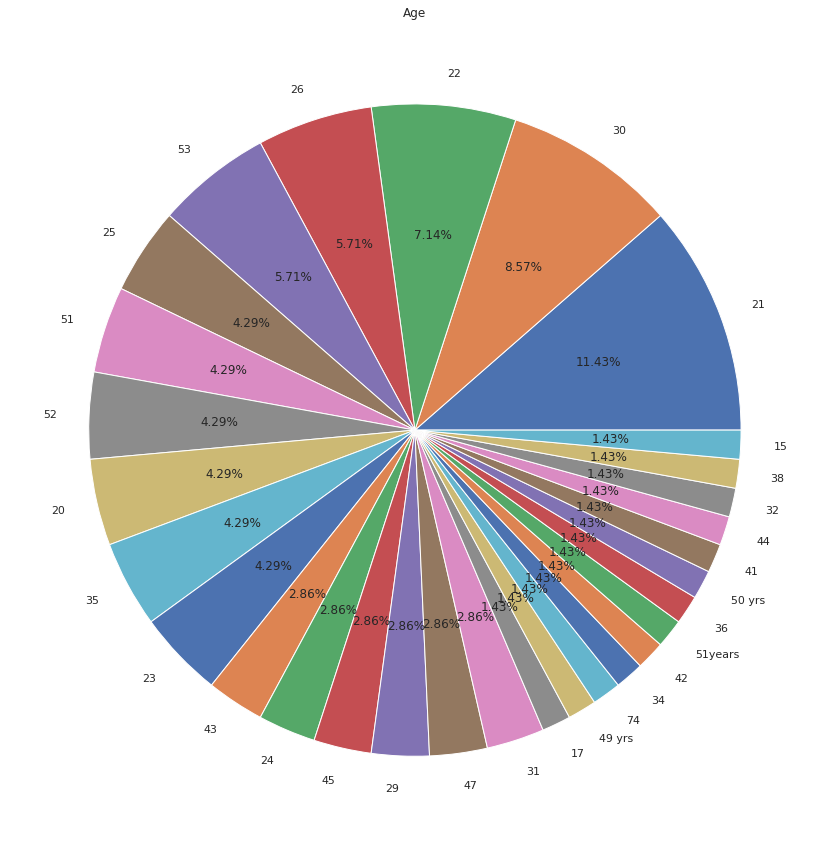

In [ ]:
data['Age'].value_counts().plot(kind ='pie',autopct='%1.2f%%',
        figsize=(20,15))
plt.axis('off')
plt.title("Age")
plt.show()

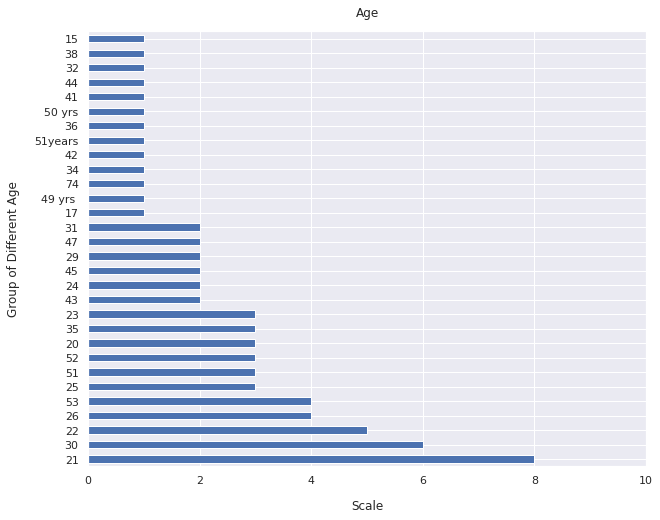

In [ ]:
data['Age'].value_counts().plot(kind='barh', figsize=(10, 8))
plt.xlabel("Scale", labelpad=14)
plt.ylabel("Group of Different Age", labelpad=14)
plt.xlim(0, 10)
plt.title("Age", y=1.02);

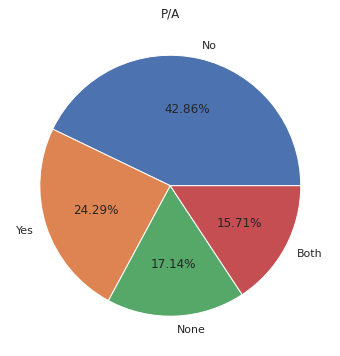

In [ ]:
data['P/A'].value_counts().plot(kind ='pie',autopct='%1.2f%%',
        figsize=(8, 6))
plt.axis('off')
plt.title("P/A")
plt.show()

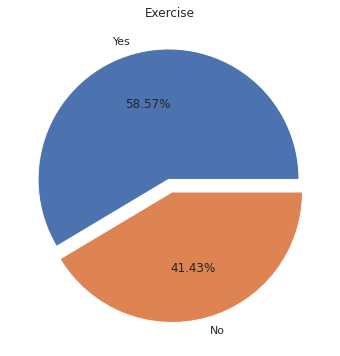

In [ ]:
data['Exercise'].value_counts().plot(kind ='pie',autopct='%1.2f%%',
        explode=[.05,.05],figsize=(8, 6))
plt.axis('off')
plt.title("Exercise")
plt.show()

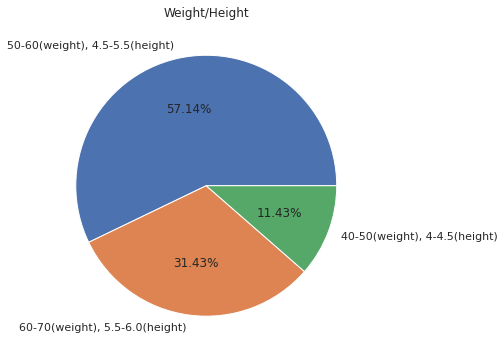

In [ ]:
data['Weight/Height'].value_counts().plot(kind ='pie',autopct='%1.2f%%',
        figsize=(8, 6))
plt.axis('off')
plt.title("Weight/Height")
plt.show()

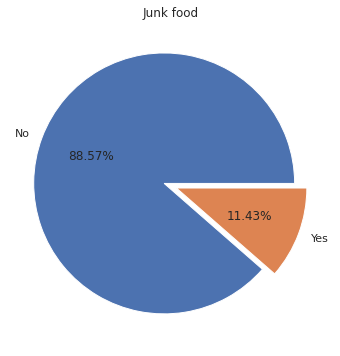

In [ ]:
data['Junk food'].value_counts().plot(kind ='pie',autopct='%1.2f%%',
        explode=[.05,.05],figsize=(8, 6))
plt.axis('off')
plt.title("Junk food")
plt.show()

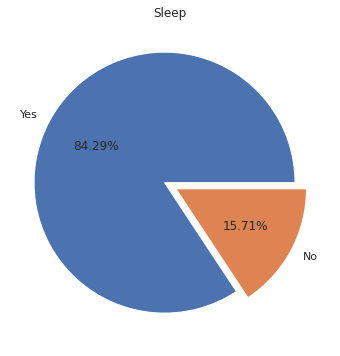

In [ ]:
data['Sleep'].value_counts().plot(kind ='pie',autopct='%1.2f%%',
        explode=[.05,.05],figsize=(8, 6))
plt.axis('off')
plt.title("Sleep")
plt.show()

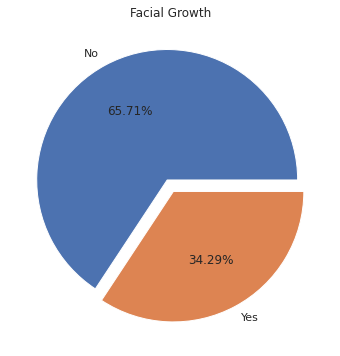

In [ ]:
data['Facial Growth'].value_counts().plot(kind ='pie',autopct='%1.2f%%',
        explode=[.05,.05],figsize=(8, 6))
plt.axis('off')
plt.title("Facial Growth")
plt.show()

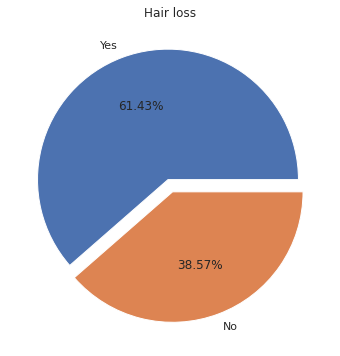

In [ ]:
data['Hair loss'].value_counts().plot(kind ='pie',autopct='%1.2f%%',
        explode=[.05,.05],figsize=(8, 6))
plt.axis('off')
plt.title("Hair loss")
plt.show()

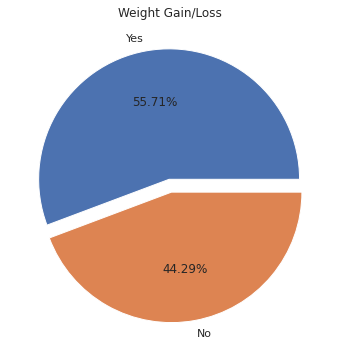

In [ ]:
data['Weight Gain/Loss'].value_counts().plot(kind ='pie',autopct='%1.2f%%',
        explode=[.05,.05],figsize=(8, 6))
plt.axis('off')
plt.title("Weight Gain/Loss")
plt.show()

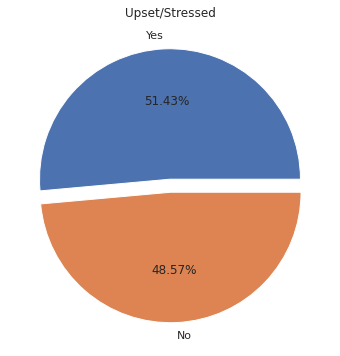

In [ ]:
data['Upset/Stressed'].value_counts().plot(kind ='pie',autopct='%1.2f%%',
        explode=[.05,.05],figsize=(8, 6))
plt.axis('off')
plt.title("Upset/Stressed")
plt.show()

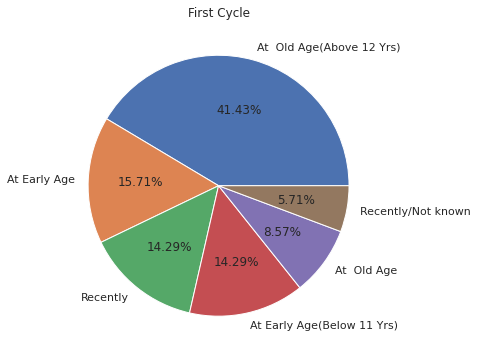

In [ ]:
data['First Cycle'].value_counts().plot(kind ='pie',autopct='%1.2f%%',
        figsize=(8, 6))
plt.axis('off')
plt.title("First Cycle")
plt.show()

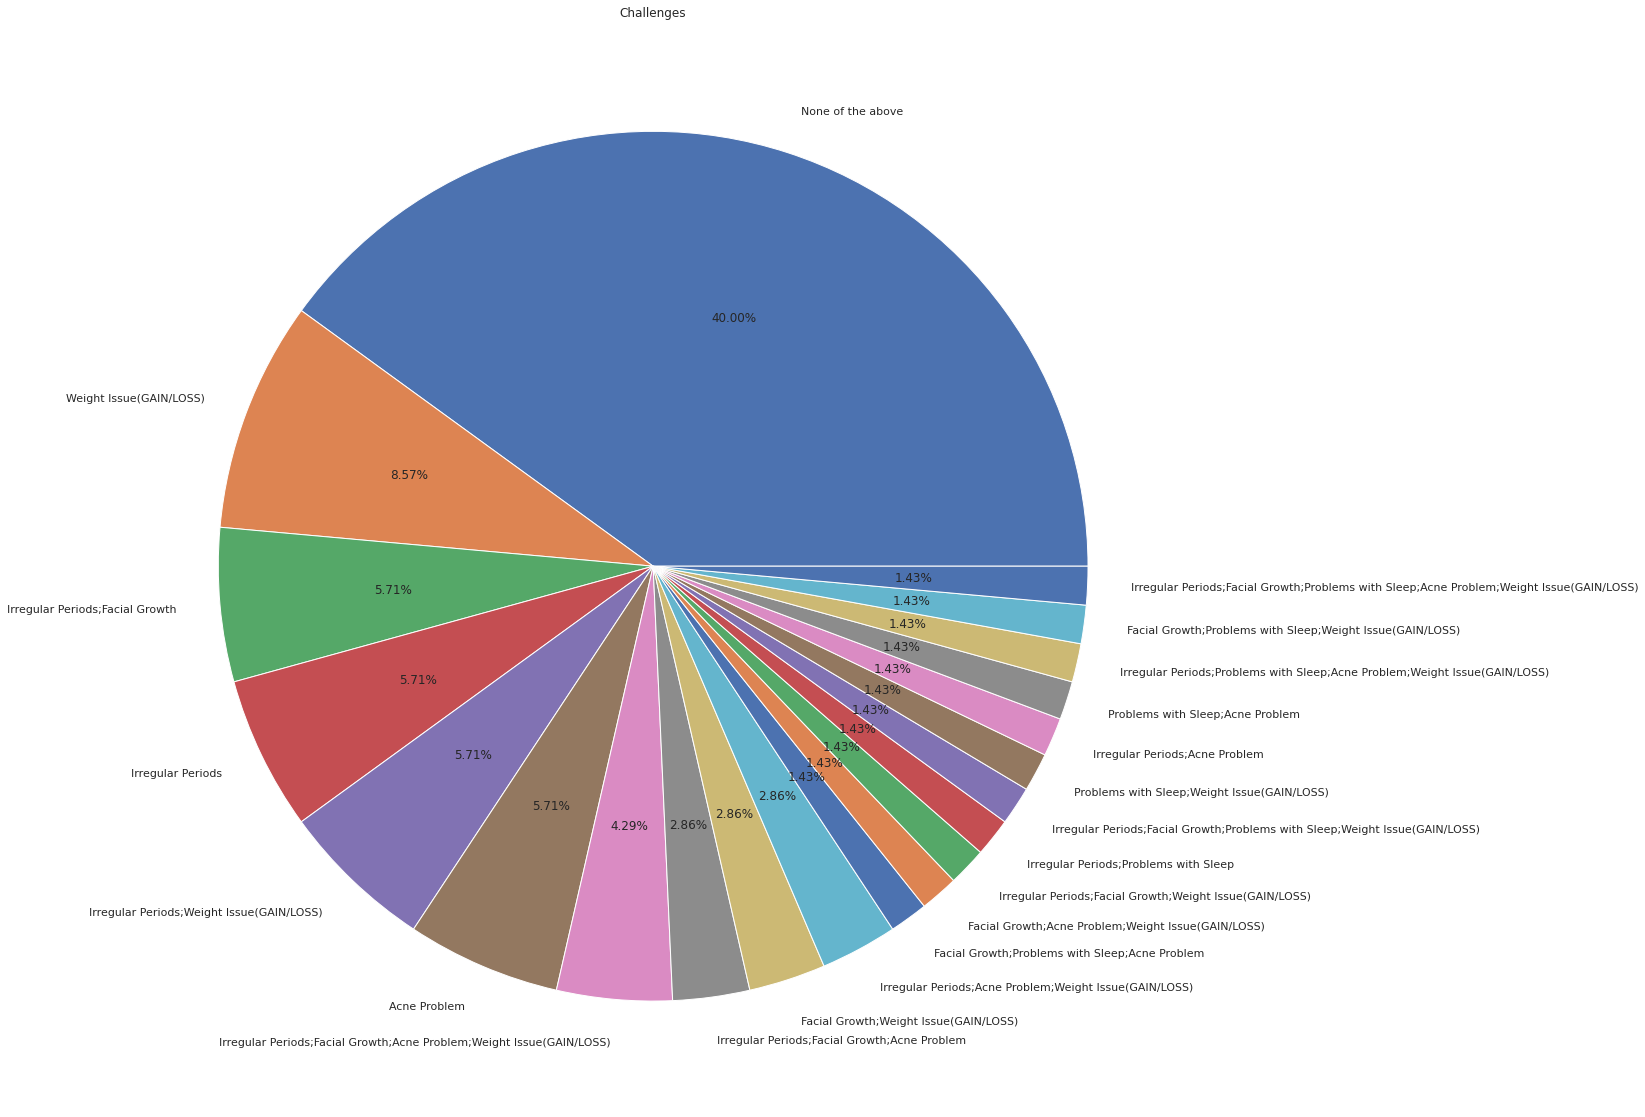

In [ ]:
data['Challenges'].value_counts().plot(kind='pie',autopct='%1.2f%%',
        figsize=(25,20))
plt.axis('off')
plt.title("Challenges")
plt.show()

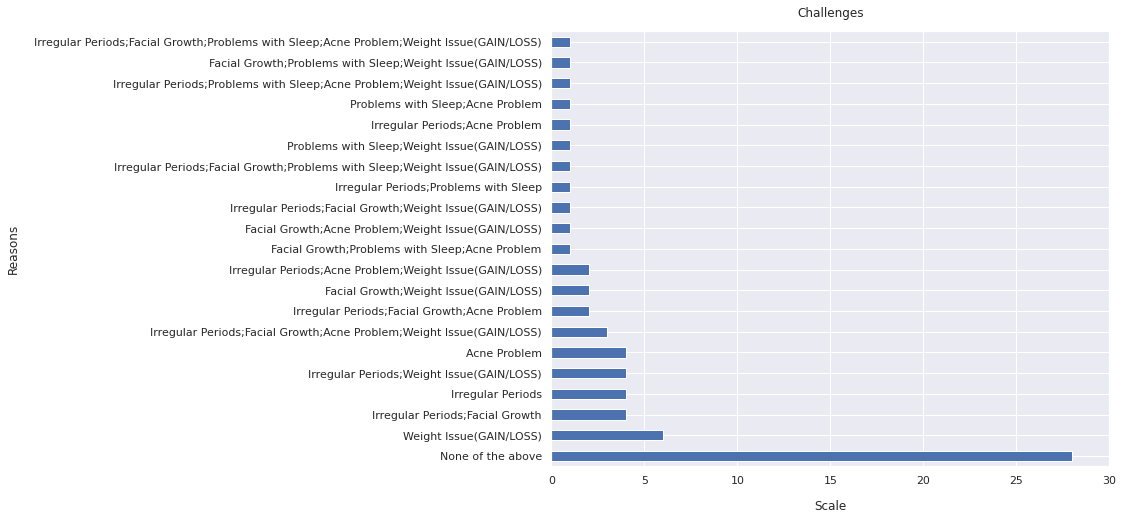

In [ ]:
data[ 'Challenges'].value_counts().plot(kind='barh', figsize=(10, 8))
plt.xlabel("Scale", labelpad=14)
plt.ylabel("Reasons", labelpad=14)
plt.xlim(0, 30)
plt.title("Challenges", y=1.02);

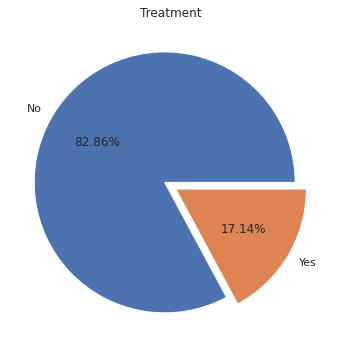

In [ ]:
data['Treatment'].value_counts().plot(kind='pie',autopct='%1.2f%%',
        explode=[.05,.05],figsize=(8, 6))
plt.axis('off')
plt.title("Treatment")
plt.show()

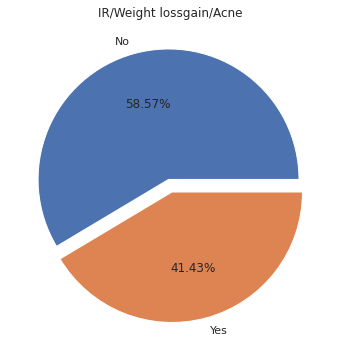

In [ ]:
data['IR/Weight lossgain/Acne'].value_counts().plot(kind='pie',autopct='%1.2f%%',
        explode=[.05,.05],figsize=(8, 6))
plt.axis('off')
plt.title("IR/Weight lossgain/Acne")
plt.show()

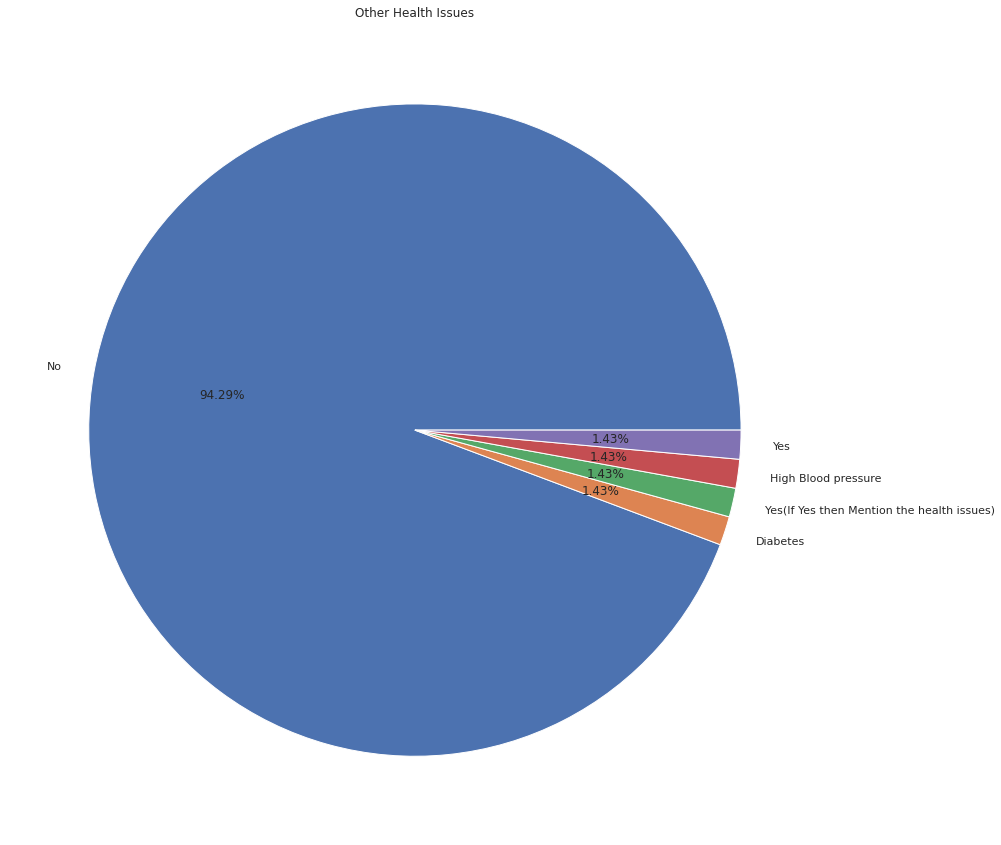

In [ ]:
data['Other Health Issues'].value_counts().plot(kind='pie',autopct='%1.2f%%',
      figsize=(20,15))
plt.axis('off')
plt.title("Other Health Issues")
plt.show()

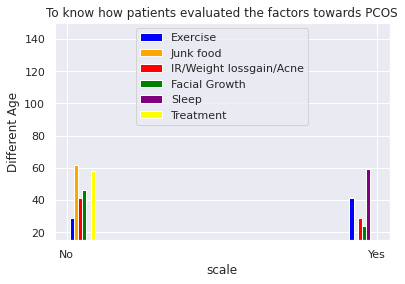

In [ ]:
plt.hist([data['Exercise'],data['Junk food'],data['IR/Weight lossgain/Acne'],data['Facial Growth'],data['Sleep'],data['Treatment']], color=['blue', 'orange','red','green','purple','yellow'])
plt.title('To know how patients evaluated the factors towards PCOS')
plt.ylabel('Different Age')
plt.xlabel('scale')
plt.legend(['Exercise','Junk food','IR/Weight lossgain/Acne','Facial Growth','Sleep','Treatment'],loc=9)
plt.ylim(15, 150)
plt.show()
plt.rcParams["figure.figsize"] = (10, 8)

###To identify patients perception towards PCOS

In [ ]:
diff = pd.crosstab(data['Treatment'],data['Challenges'])

In [ ]:
diff

Challenges,Acne Problem,Facial Growth;Acne Problem;Weight Issue(GAIN/LOSS),Facial Growth;Problems with Sleep;Acne Problem,Facial Growth;Problems with Sleep;Weight Issue(GAIN/LOSS),Facial Growth;Weight Issue(GAIN/LOSS),Irregular Periods,Irregular Periods;Acne Problem,Irregular Periods;Acne Problem;Weight Issue(GAIN/LOSS),Irregular Periods;Facial Growth,Irregular Periods;Facial Growth;Acne Problem,...,Irregular Periods;Facial Growth;Problems with Sleep;Acne Problem;Weight Issue(GAIN/LOSS),Irregular Periods;Facial Growth;Problems with Sleep;Weight Issue(GAIN/LOSS),Irregular Periods;Facial Growth;Weight Issue(GAIN/LOSS),Irregular Periods;Problems with Sleep,Irregular Periods;Problems with Sleep;Acne Problem;Weight Issue(GAIN/LOSS),Irregular Periods;Weight Issue(GAIN/LOSS),None of the above,Problems with Sleep;Acne Problem,Problems with Sleep;Weight Issue(GAIN/LOSS),Weight Issue(GAIN/LOSS)
Treatment,,,,,,,,,,,,,,,,,,,,,
No,4,1,1,1,1,2,1,1,3,1,...,1,1,0,0,0,4,28,1,1,4
Yes,0,0,0,0,1,2,0,1,1,1,...,0,0,1,1,1,0,0,0,0,2


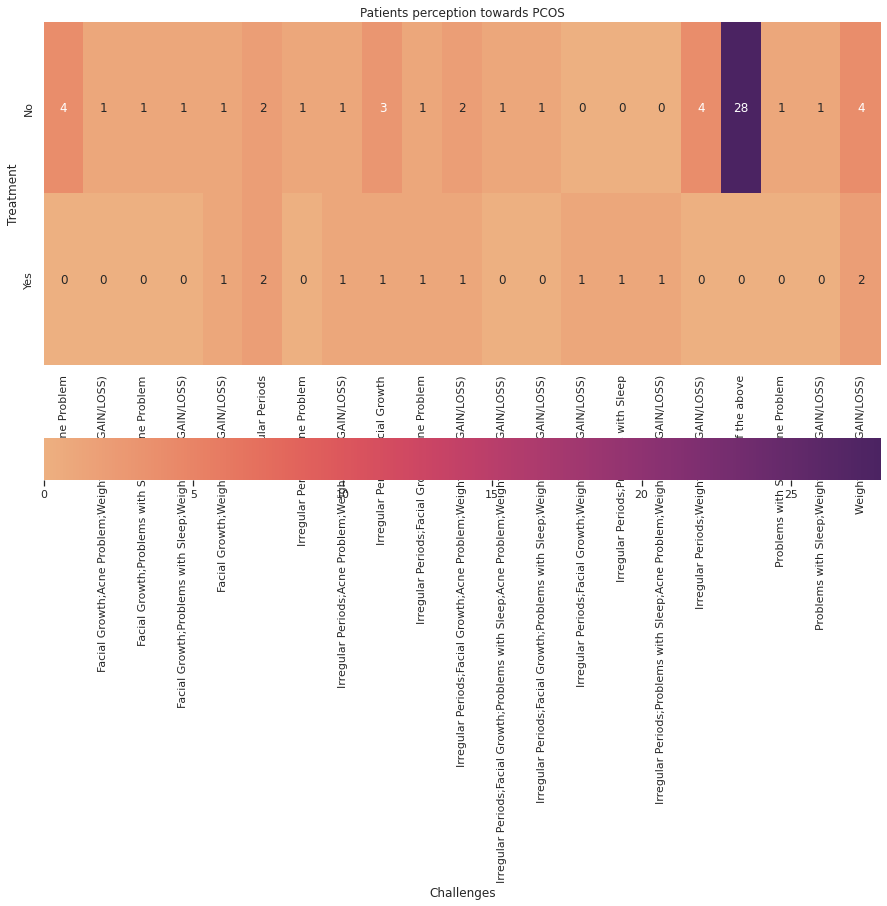

In [ ]:
plt.figure(figsize=(15, 9))
plt.xlabel('Q.13 Are you taking any treatment for PCOS? [Traetment]',)
plt.ylabel('Q.14 Are you facing problem with irregular periods and weight loss/gain and acne? [IR/Weight lossgain/Acne]')
plt.title('Patients perception towards PCOS')
sns.heatmap(diff, annot = True, cmap = 'flare', fmt = 'd', cbar_kws={"orientation": "horizontal"});

###Converting The Data to Integer

###Function for converting binary data

In [ ]:
def trans_con(x):
    if x == 'Yes':
        return 1
    if x == 'No':
        return 0

In [ ]:
data['Exercise'] = data['Exercise'].apply(trans_con)
data['Junk food'] = data['Junk food'].apply(trans_con)



In [ ]:
data

,Timestamp,Age,P/A,Exercise,Weight/Height,Junk food,Sleep,Facial Growth,Hair loss,Weight Gain/Loss,Upset/Stressed,First Cycle,Challenges,Treatment,IR/Weight lossgain/Acne,Other Health Issues
0,2022/01/17 11:48:04 AM GMT+5:30,22,No,0,"40-50(weight), 4-4.5(height)",0,Yes,No,Yes,Yes,Yes,At Old Age,None of the above,No,No,No
1,2022/01/17 12:00:31 PM GMT+5:30,53,No,1,"60-70(weight), 5.5-6.0(height)",0,Yes,No,Yes,No,Yes,At Early Age,Irregular Periods,Yes,Yes,No
2,2022/01/17 12:04:39 PM GMT+5:30,22,None,1,"50-60(weight), 4.5-5.5(height)",0,No,No,Yes,No,No,At Old Age,None of the above,No,No,No
3,2022/01/17 12:05:53 PM GMT+5:30,22,Yes,0,"50-60(weight), 4.5-5.5(height)",0,No,Yes,No,Yes,Yes,At Old Age,Irregular Periods;Problems with Sleep,Yes,Yes,No
4,2022/01/17 12:18:05 PM GMT+5:30,22,No,1,"40-50(weight), 4-4.5(height)",0,Yes,No,No,Yes,No,At Early Age,None of the above,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,2022/05/01 5:56:13 PM GMT+5:30,24,None,0,"50-60(weight), 4.5-5.5(height)",0,Yes,No,Yes,No,No,At Old Age(Above 12 Yrs),Weight Issue(GAIN/LOSS),No,No,No
66,2022/05/01 5:58:19 PM GMT+5:30,15,No,1,"40-50(weight), 4-4.5(height)",0,Yes,Yes,No,No,No,At Early Age(Below 11 Yrs),Irregular Periods;Facial Growth;Acne Problem,No,Yes,No
67,2022/05/01 6:09:59 PM GMT+5:30,23,No,0,"50-60(weight), 4.5-5.5(height)",0,No,No,No,No,No,At Old Age(Above 12 Yrs),None of the above,No,No,No
68,2022/05/01 6:31:52 PM GMT+5:30,21,No,1,"60-70(weight), 5.5-6.0(height)",0,Yes,No,Yes,Yes,Yes,At Old Age(Above 12 Yrs),Irregular Periods;Weight Issue(GAIN/LOSS),No,Yes,No


In [ ]:
data['Sleep'] = data['Sleep'].apply(trans_con)
data['Facial Growth'] = data['Facial Growth'].apply(trans_con)

In [ ]:
data

,Timestamp,Age,P/A,Exercise,Weight/Height,Junk food,Sleep,Facial Growth,Hair loss,Weight Gain/Loss,Upset/Stressed,First Cycle,Challenges,Treatment,IR/Weight lossgain/Acne,Other Health Issues
0,2022/01/17 11:48:04 AM GMT+5:30,22,No,0,"40-50(weight), 4-4.5(height)",0,1,0,Yes,Yes,Yes,At Old Age,None of the above,No,No,No
1,2022/01/17 12:00:31 PM GMT+5:30,53,No,1,"60-70(weight), 5.5-6.0(height)",0,1,0,Yes,No,Yes,At Early Age,Irregular Periods,Yes,Yes,No
2,2022/01/17 12:04:39 PM GMT+5:30,22,None,1,"50-60(weight), 4.5-5.5(height)",0,0,0,Yes,No,No,At Old Age,None of the above,No,No,No
3,2022/01/17 12:05:53 PM GMT+5:30,22,Yes,0,"50-60(weight), 4.5-5.5(height)",0,0,1,No,Yes,Yes,At Old Age,Irregular Periods;Problems with Sleep,Yes,Yes,No
4,2022/01/17 12:18:05 PM GMT+5:30,22,No,1,"40-50(weight), 4-4.5(height)",0,1,0,No,Yes,No,At Early Age,None of the above,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,2022/05/01 5:56:13 PM GMT+5:30,24,None,0,"50-60(weight), 4.5-5.5(height)",0,1,0,Yes,No,No,At Old Age(Above 12 Yrs),Weight Issue(GAIN/LOSS),No,No,No
66,2022/05/01 5:58:19 PM GMT+5:30,15,No,1,"40-50(weight), 4-4.5(height)",0,1,1,No,No,No,At Early Age(Below 11 Yrs),Irregular Periods;Facial Growth;Acne Problem,No,Yes,No
67,2022/05/01 6:09:59 PM GMT+5:30,23,No,0,"50-60(weight), 4.5-5.5(height)",0,0,0,No,No,No,At Old Age(Above 12 Yrs),None of the above,No,No,No
68,2022/05/01 6:31:52 PM GMT+5:30,21,No,1,"60-70(weight), 5.5-6.0(height)",0,1,0,Yes,Yes,Yes,At Old Age(Above 12 Yrs),Irregular Periods;Weight Issue(GAIN/LOSS),No,Yes,No


In [ ]:
data['Hair loss'] = data['Hair loss'].apply(trans_con)
data['Weight Gain/Loss'] = data['Weight Gain/Loss'].apply(trans_con)


In [ ]:
data

,Timestamp,Age,P/A,Exercise,Weight/Height,Junk food,Sleep,Facial Growth,Hair loss,Weight Gain/Loss,Upset/Stressed,First Cycle,Challenges,Treatment,IR/Weight lossgain/Acne,Other Health Issues
0,2022/01/17 11:48:04 AM GMT+5:30,22,No,0,"40-50(weight), 4-4.5(height)",0,1,0,1,1,Yes,At Old Age,None of the above,No,No,No
1,2022/01/17 12:00:31 PM GMT+5:30,53,No,1,"60-70(weight), 5.5-6.0(height)",0,1,0,1,0,Yes,At Early Age,Irregular Periods,Yes,Yes,No
2,2022/01/17 12:04:39 PM GMT+5:30,22,None,1,"50-60(weight), 4.5-5.5(height)",0,0,0,1,0,No,At Old Age,None of the above,No,No,No
3,2022/01/17 12:05:53 PM GMT+5:30,22,Yes,0,"50-60(weight), 4.5-5.5(height)",0,0,1,0,1,Yes,At Old Age,Irregular Periods;Problems with Sleep,Yes,Yes,No
4,2022/01/17 12:18:05 PM GMT+5:30,22,No,1,"40-50(weight), 4-4.5(height)",0,1,0,0,1,No,At Early Age,None of the above,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,2022/05/01 5:56:13 PM GMT+5:30,24,None,0,"50-60(weight), 4.5-5.5(height)",0,1,0,1,0,No,At Old Age(Above 12 Yrs),Weight Issue(GAIN/LOSS),No,No,No
66,2022/05/01 5:58:19 PM GMT+5:30,15,No,1,"40-50(weight), 4-4.5(height)",0,1,1,0,0,No,At Early Age(Below 11 Yrs),Irregular Periods;Facial Growth;Acne Problem,No,Yes,No
67,2022/05/01 6:09:59 PM GMT+5:30,23,No,0,"50-60(weight), 4.5-5.5(height)",0,0,0,0,0,No,At Old Age(Above 12 Yrs),None of the above,No,No,No
68,2022/05/01 6:31:52 PM GMT+5:30,21,No,1,"60-70(weight), 5.5-6.0(height)",0,1,0,1,1,Yes,At Old Age(Above 12 Yrs),Irregular Periods;Weight Issue(GAIN/LOSS),No,Yes,No


In [ ]:
data['Upset/Stressed'] = data['Upset/Stressed'].apply(trans_con)
data['Treatment'] = data['Treatment'].apply(trans_con)



In [ ]:
data

,Timestamp,Age,P/A,Exercise,Weight/Height,Junk food,Sleep,Facial Growth,Hair loss,Weight Gain/Loss,Upset/Stressed,First Cycle,Challenges,Treatment,IR/Weight lossgain/Acne,Other Health Issues
0,2022/01/17 11:48:04 AM GMT+5:30,22,No,0,"40-50(weight), 4-4.5(height)",0,1,0,1,1,1,At Old Age,None of the above,0,No,No
1,2022/01/17 12:00:31 PM GMT+5:30,53,No,1,"60-70(weight), 5.5-6.0(height)",0,1,0,1,0,1,At Early Age,Irregular Periods,1,Yes,No
2,2022/01/17 12:04:39 PM GMT+5:30,22,None,1,"50-60(weight), 4.5-5.5(height)",0,0,0,1,0,0,At Old Age,None of the above,0,No,No
3,2022/01/17 12:05:53 PM GMT+5:30,22,Yes,0,"50-60(weight), 4.5-5.5(height)",0,0,1,0,1,1,At Old Age,Irregular Periods;Problems with Sleep,1,Yes,No
4,2022/01/17 12:18:05 PM GMT+5:30,22,No,1,"40-50(weight), 4-4.5(height)",0,1,0,0,1,0,At Early Age,None of the above,0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,2022/05/01 5:56:13 PM GMT+5:30,24,None,0,"50-60(weight), 4.5-5.5(height)",0,1,0,1,0,0,At Old Age(Above 12 Yrs),Weight Issue(GAIN/LOSS),0,No,No
66,2022/05/01 5:58:19 PM GMT+5:30,15,No,1,"40-50(weight), 4-4.5(height)",0,1,1,0,0,0,At Early Age(Below 11 Yrs),Irregular Periods;Facial Growth;Acne Problem,0,Yes,No
67,2022/05/01 6:09:59 PM GMT+5:30,23,No,0,"50-60(weight), 4.5-5.5(height)",0,0,0,0,0,0,At Old Age(Above 12 Yrs),None of the above,0,No,No
68,2022/05/01 6:31:52 PM GMT+5:30,21,No,1,"60-70(weight), 5.5-6.0(height)",0,1,0,1,1,1,At Old Age(Above 12 Yrs),Irregular Periods;Weight Issue(GAIN/LOSS),0,Yes,No


In [ ]:
data['IR/Weight lossgain/Acne'] = data['IR/Weight lossgain/Acne'].apply(trans_con)


In [ ]:
data

,Timestamp,Age,P/A,Exercise,Weight/Height,Junk food,Sleep,Facial Growth,Hair loss,Weight Gain/Loss,Upset/Stressed,First Cycle,Challenges,Treatment,IR/Weight lossgain/Acne,Other Health Issues
0,2022/01/17 11:48:04 AM GMT+5:30,22,No,0,"40-50(weight), 4-4.5(height)",0,1,0,1,1,1,At Old Age,None of the above,0,0,No
1,2022/01/17 12:00:31 PM GMT+5:30,53,No,1,"60-70(weight), 5.5-6.0(height)",0,1,0,1,0,1,At Early Age,Irregular Periods,1,1,No
2,2022/01/17 12:04:39 PM GMT+5:30,22,None,1,"50-60(weight), 4.5-5.5(height)",0,0,0,1,0,0,At Old Age,None of the above,0,0,No
3,2022/01/17 12:05:53 PM GMT+5:30,22,Yes,0,"50-60(weight), 4.5-5.5(height)",0,0,1,0,1,1,At Old Age,Irregular Periods;Problems with Sleep,1,1,No
4,2022/01/17 12:18:05 PM GMT+5:30,22,No,1,"40-50(weight), 4-4.5(height)",0,1,0,0,1,0,At Early Age,None of the above,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,2022/05/01 5:56:13 PM GMT+5:30,24,None,0,"50-60(weight), 4.5-5.5(height)",0,1,0,1,0,0,At Old Age(Above 12 Yrs),Weight Issue(GAIN/LOSS),0,0,No
66,2022/05/01 5:58:19 PM GMT+5:30,15,No,1,"40-50(weight), 4-4.5(height)",0,1,1,0,0,0,At Early Age(Below 11 Yrs),Irregular Periods;Facial Growth;Acne Problem,0,1,No
67,2022/05/01 6:09:59 PM GMT+5:30,23,No,0,"50-60(weight), 4.5-5.5(height)",0,0,0,0,0,0,At Old Age(Above 12 Yrs),None of the above,0,0,No
68,2022/05/01 6:31:52 PM GMT+5:30,21,No,1,"60-70(weight), 5.5-6.0(height)",0,1,0,1,1,1,At Old Age(Above 12 Yrs),Irregular Periods;Weight Issue(GAIN/LOSS),0,1,No


###Converting the Categorical data

In [ ]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()



Variable='P/A' NO=1,NONE=2,Yes=3,BOTH=4


In [ ]:
data['P/A'] = number.fit_transform(data['P/A'].astype('str'))

In [ ]:
data

,Timestamp,Age,P/A,Exercise,Weight/Height,Junk food,Sleep,Facial Growth,Hair loss,Weight Gain/Loss,Upset/Stressed,First Cycle,Challenges,Treatment,IR/Weight lossgain/Acne,Other Health Issues
0,2022/01/17 11:48:04 AM GMT+5:30,22,1,0,"40-50(weight), 4-4.5(height)",0,1,0,1,1,1,At Old Age,None of the above,0,0,No
1,2022/01/17 12:00:31 PM GMT+5:30,53,1,1,"60-70(weight), 5.5-6.0(height)",0,1,0,1,0,1,At Early Age,Irregular Periods,1,1,No
2,2022/01/17 12:04:39 PM GMT+5:30,22,2,1,"50-60(weight), 4.5-5.5(height)",0,0,0,1,0,0,At Old Age,None of the above,0,0,No
3,2022/01/17 12:05:53 PM GMT+5:30,22,3,0,"50-60(weight), 4.5-5.5(height)",0,0,1,0,1,1,At Old Age,Irregular Periods;Problems with Sleep,1,1,No
4,2022/01/17 12:18:05 PM GMT+5:30,22,1,1,"40-50(weight), 4-4.5(height)",0,1,0,0,1,0,At Early Age,None of the above,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,2022/05/01 5:56:13 PM GMT+5:30,24,2,0,"50-60(weight), 4.5-5.5(height)",0,1,0,1,0,0,At Old Age(Above 12 Yrs),Weight Issue(GAIN/LOSS),0,0,No
66,2022/05/01 5:58:19 PM GMT+5:30,15,1,1,"40-50(weight), 4-4.5(height)",0,1,1,0,0,0,At Early Age(Below 11 Yrs),Irregular Periods;Facial Growth;Acne Problem,0,1,No
67,2022/05/01 6:09:59 PM GMT+5:30,23,1,0,"50-60(weight), 4.5-5.5(height)",0,0,0,0,0,0,At Old Age(Above 12 Yrs),None of the above,0,0,No
68,2022/05/01 6:31:52 PM GMT+5:30,21,1,1,"60-70(weight), 5.5-6.0(height)",0,1,0,1,1,1,At Old Age(Above 12 Yrs),Irregular Periods;Weight Issue(GAIN/LOSS),0,1,No


Variable='Weight/Height' 40-50(weight),4-4.5(height)=0, 50-60(weight), 4.5-5.5(height)=1, 60-70(weight), 5.5-6.0(height)=2

In [ ]:
data['Weight/Height'] = number.fit_transform(data['Weight/Height'].astype('str'))

In [ ]:
data

,Timestamp,Age,P/A,Exercise,Weight/Height,Junk food,Sleep,Facial Growth,Hair loss,Weight Gain/Loss,Upset/Stressed,First Cycle,Challenges,Treatment,IR/Weight lossgain/Acne,Other Health Issues
0,2022/01/17 11:48:04 AM GMT+5:30,22,1,0,0,0,1,0,1,1,1,At Old Age,None of the above,0,0,No
1,2022/01/17 12:00:31 PM GMT+5:30,53,1,1,2,0,1,0,1,0,1,At Early Age,Irregular Periods,1,1,No
2,2022/01/17 12:04:39 PM GMT+5:30,22,2,1,1,0,0,0,1,0,0,At Old Age,None of the above,0,0,No
3,2022/01/17 12:05:53 PM GMT+5:30,22,3,0,1,0,0,1,0,1,1,At Old Age,Irregular Periods;Problems with Sleep,1,1,No
4,2022/01/17 12:18:05 PM GMT+5:30,22,1,1,0,0,1,0,0,1,0,At Early Age,None of the above,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,2022/05/01 5:56:13 PM GMT+5:30,24,2,0,1,0,1,0,1,0,0,At Old Age(Above 12 Yrs),Weight Issue(GAIN/LOSS),0,0,No
66,2022/05/01 5:58:19 PM GMT+5:30,15,1,1,0,0,1,1,0,0,0,At Early Age(Below 11 Yrs),Irregular Periods;Facial Growth;Acne Problem,0,1,No
67,2022/05/01 6:09:59 PM GMT+5:30,23,1,0,1,0,0,0,0,0,0,At Old Age(Above 12 Yrs),None of the above,0,0,No
68,2022/05/01 6:31:52 PM GMT+5:30,21,1,1,2,0,1,0,1,1,1,At Old Age(Above 12 Yrs),Irregular Periods;Weight Issue(GAIN/LOSS),0,1,No


Variable='First Cycle' At Old Age=0,At Old Age(Above 12 Yrs)=1, At Early Age=2, At Early Age(Below 11 Yrs)=3, Recently=4

In [ ]:
data['First Cycle'] = number.fit_transform(data['First Cycle'].astype('str'))

In [ ]:
data

,Timestamp,Age,P/A,Exercise,Weight/Height,Junk food,Sleep,Facial Growth,Hair loss,Weight Gain/Loss,Upset/Stressed,First Cycle,Challenges,Treatment,IR/Weight lossgain/Acne,Other Health Issues
0,2022/01/17 11:48:04 AM GMT+5:30,22,1,0,0,0,1,0,1,1,1,0,None of the above,0,0,No
1,2022/01/17 12:00:31 PM GMT+5:30,53,1,1,2,0,1,0,1,0,1,2,Irregular Periods,1,1,No
2,2022/01/17 12:04:39 PM GMT+5:30,22,2,1,1,0,0,0,1,0,0,0,None of the above,0,0,No
3,2022/01/17 12:05:53 PM GMT+5:30,22,3,0,1,0,0,1,0,1,1,0,Irregular Periods;Problems with Sleep,1,1,No
4,2022/01/17 12:18:05 PM GMT+5:30,22,1,1,0,0,1,0,0,1,0,2,None of the above,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,2022/05/01 5:56:13 PM GMT+5:30,24,2,0,1,0,1,0,1,0,0,1,Weight Issue(GAIN/LOSS),0,0,No
66,2022/05/01 5:58:19 PM GMT+5:30,15,1,1,0,0,1,1,0,0,0,3,Irregular Periods;Facial Growth;Acne Problem,0,1,No
67,2022/05/01 6:09:59 PM GMT+5:30,23,1,0,1,0,0,0,0,0,0,1,None of the above,0,0,No
68,2022/05/01 6:31:52 PM GMT+5:30,21,1,1,2,0,1,0,1,1,1,1,Irregular Periods;Weight Issue(GAIN/LOSS),0,1,No


Variable='Other Health Issues'Diabetes/High Blood Pressure/Yes(If Yes then Mention the health issues)=0,Yes=1,No=2

In [ ]:
data['Other Health Issues'] = number.fit_transform(data['Other Health Issues'].astype('str'))

In [ ]:
data

,Timestamp,Age,P/A,Exercise,Weight/Height,Junk food,Sleep,Facial Growth,Hair loss,Weight Gain/Loss,Upset/Stressed,First Cycle,Challenges,Treatment,IR/Weight lossgain/Acne,Other Health Issues
0,2022/01/17 11:48:04 AM GMT+5:30,22,1,0,0,0,1,0,1,1,1,0,None of the above,0,0,2
1,2022/01/17 12:00:31 PM GMT+5:30,53,1,1,2,0,1,0,1,0,1,2,Irregular Periods,1,1,2
2,2022/01/17 12:04:39 PM GMT+5:30,22,2,1,1,0,0,0,1,0,0,0,None of the above,0,0,2
3,2022/01/17 12:05:53 PM GMT+5:30,22,3,0,1,0,0,1,0,1,1,0,Irregular Periods;Problems with Sleep,1,1,2
4,2022/01/17 12:18:05 PM GMT+5:30,22,1,1,0,0,1,0,0,1,0,2,None of the above,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,2022/05/01 5:56:13 PM GMT+5:30,24,2,0,1,0,1,0,1,0,0,1,Weight Issue(GAIN/LOSS),0,0,2
66,2022/05/01 5:58:19 PM GMT+5:30,15,1,1,0,0,1,1,0,0,0,3,Irregular Periods;Facial Growth;Acne Problem,0,1,2
67,2022/05/01 6:09:59 PM GMT+5:30,23,1,0,1,0,0,0,0,0,0,1,None of the above,0,0,2
68,2022/05/01 6:31:52 PM GMT+5:30,21,1,1,2,0,1,0,1,1,1,1,Irregular Periods;Weight Issue(GAIN/LOSS),0,1,2


In [ ]:
data['Challenges'] = number.fit_transform(data['Challenges'].astype('str'))

In [ ]:
data

,Timestamp,Age,P/A,Exercise,Weight/Height,Junk food,Sleep,Facial Growth,Hair loss,Weight Gain/Loss,Upset/Stressed,First Cycle,Challenges,Treatment,IR/Weight lossgain/Acne,Other Health Issues
0,2022/01/17 11:48:04 AM GMT+5:30,22,1,0,0,0,1,0,1,1,1,0,13,0,0,2
1,2022/01/17 12:00:31 PM GMT+5:30,53,1,1,2,0,1,0,1,0,1,2,19,1,1,2
2,2022/01/17 12:04:39 PM GMT+5:30,22,2,1,1,0,0,0,1,0,0,0,13,0,0,2
3,2022/01/17 12:05:53 PM GMT+5:30,22,3,0,1,0,0,1,0,1,1,0,9,1,1,2
4,2022/01/17 12:18:05 PM GMT+5:30,22,1,1,0,0,1,0,0,1,0,2,13,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,2022/05/01 5:56:13 PM GMT+5:30,24,2,0,1,0,1,0,1,0,0,1,16,0,0,2
66,2022/05/01 5:58:19 PM GMT+5:30,15,1,1,0,0,1,1,0,0,0,3,5,0,1,2
67,2022/05/01 6:09:59 PM GMT+5:30,23,1,0,1,0,0,0,0,0,0,1,13,0,0,2
68,2022/05/01 6:31:52 PM GMT+5:30,21,1,1,2,0,1,0,1,1,1,1,11,0,1,2


###Correlation betweens variables

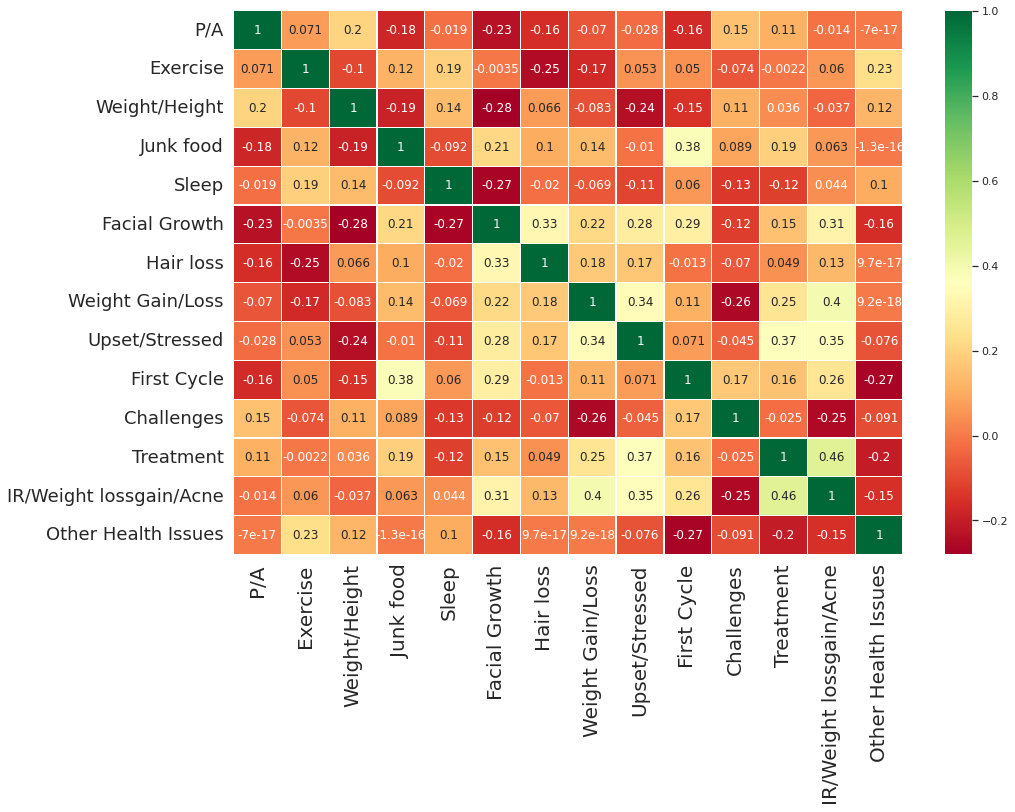

In [ ]:
cols=['P/A', 'Exercise', 'Weight/Height', 'Junk food',
       'Sleep', 'Facial Growth', 'Hair loss', 'Weight Gain/Loss',
       'Upset/Stressed', 'First Cycle', 'Challenges', 'Treatment',
       'IR/Weight lossgain/Acne', 'Other Health Issues']

g = sns.heatmap(data[cols].corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
g.set_xticklabels(g.get_ymajorticklabels(), fontsize = 20)
g.set_yticklabels(g.get_ymajorticklabels(), fontsize = 18)
fig=plt.gcf()
fig.set_size_inches(15,10)
plt.show()

In [ ]:
data.corr()

,P/A,Exercise,Weight/Height,Junk food,Sleep,Facial Growth,Hair loss,Weight Gain/Loss,Upset/Stressed,First Cycle,Challenges,Treatment,IR/Weight lossgain/Acne,Other Health Issues
P/A,1.000000e+00,0.070755,0.201286,-1.752768e-01,-0.019154,-0.234969,-1.575259e-01,-7.016689e-02,-0.027894,-0.163251,0.151267,0.110974,-0.014151,-6.999476e-17
Exercise,7.075456e-02,1.000000,-0.102352,1.197998e-01,0.194663,-0.003491,-2.493794e-01,-1.659774e-01,0.053052,0.049689,-0.073998,-0.002199,0.059714,2.301862e-01
Weight/Height,2.012864e-01,-0.102352,1.000000,-1.872824e-01,0.138537,-0.280032,6.591382e-02,-8.304700e-02,-0.238439,-0.149630,0.112215,0.036485,-0.037219,1.212678e-01
Junk food,-1.752768e-01,0.119800,-0.187282,1.000000e+00,-0.091652,0.213517,1.001513e-01,1.394665e-01,-0.010267,0.378746,0.088752,0.194026,0.062504,-1.254837e-16
Sleep,-1.915371e-02,0.194663,0.138537,-9.165162e-02,1.000000,-0.266994,-1.958441e-02,-6.886433e-02,-0.105467,0.060093,-0.134896,-0.116056,0.044397,1.038548e-01
Facial Growth,-2.349691e-01,-0.003491,-0.280032,2.135166e-01,-0.266994,1.000000,3.250478e-01,2.198548e-01,0.280442,0.291702,-0.122965,0.150586,0.308978,-1.592555e-01
Hair loss,-1.575259e-01,-0.249379,0.065914,1.001513e-01,-0.019584,0.325048,1.000000e+00,1.797837e-01,0.169451,-0.012794,-0.069908,0.048948,0.130222,9.706322e-17
Weight Gain/Loss,-7.016689e-02,-0.165977,-0.083047,1.394665e-01,-0.068864,0.219855,1.797837e-01,1.000000e+00,0.341971,0.111091,-0.259622,0.252912,0.399513,9.239308e-18
Upset/Stressed,-2.789425e-02,0.053052,-0.238439,-1.026735e-02,-0.105467,0.280442,1.694512e-01,3.419712e-01,1.000000,0.070707,-0.045289,0.366203,0.353125,-7.562377e-02
First Cycle,-1.632508e-01,0.049689,-0.149630,3.787463e-01,0.060093,0.291702,-1.279435e-02,1.110907e-01,0.070707,1.000000,0.171034,0.156791,0.259030,-2.682347e-01


###Conversion Using One Hot Encoding

In [ ]:
one_hot_data = pd.get_dummies(data[['P/A', 'Exercise', 'Weight/Height', 'Junk food',
       'Sleep', 'Facial Growth', 'Hair loss', 'Weight Gain/Loss',
       'Upset/Stressed', 'First Cycle', 'Challenges', 'Treatment',
       'IR/Weight lossgain/Acne', 'Other Health Issues']])

In [ ]:
one_hot_data

,P/A,Exercise,Weight/Height,Junk food,Sleep,Facial Growth,Hair loss,Weight Gain/Loss,Upset/Stressed,First Cycle,Challenges,Treatment,IR/Weight lossgain/Acne,Other Health Issues
0,1,0,0,0,1,0,1,1,1,0,13,0,0,2
1,1,1,2,0,1,0,1,0,1,2,19,1,1,2
2,2,1,1,0,0,0,1,0,0,0,13,0,0,2
3,3,0,1,0,0,1,0,1,1,0,9,1,1,2
4,1,1,0,0,1,0,0,1,0,2,13,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,2,0,1,0,1,0,1,0,0,1,16,0,0,2
66,1,1,0,0,1,1,0,0,0,3,5,0,1,2
67,1,0,1,0,0,0,0,0,0,1,13,0,0,2
68,1,1,2,0,1,0,1,1,1,1,11,0,1,2


In [ ]:
one_hot_data.columns

Index(['P/A', 'Exercise', 'Weight/Height', 'Junk food', 'Sleep',
       'Facial Growth', 'Hair loss', 'Weight Gain/Loss', 'Upset/Stressed',
       'First Cycle', 'Challenges', 'Treatment', 'IR/Weight lossgain/Acne',
       'Other Health Issues'],
      dtype='object')

###Algorithms

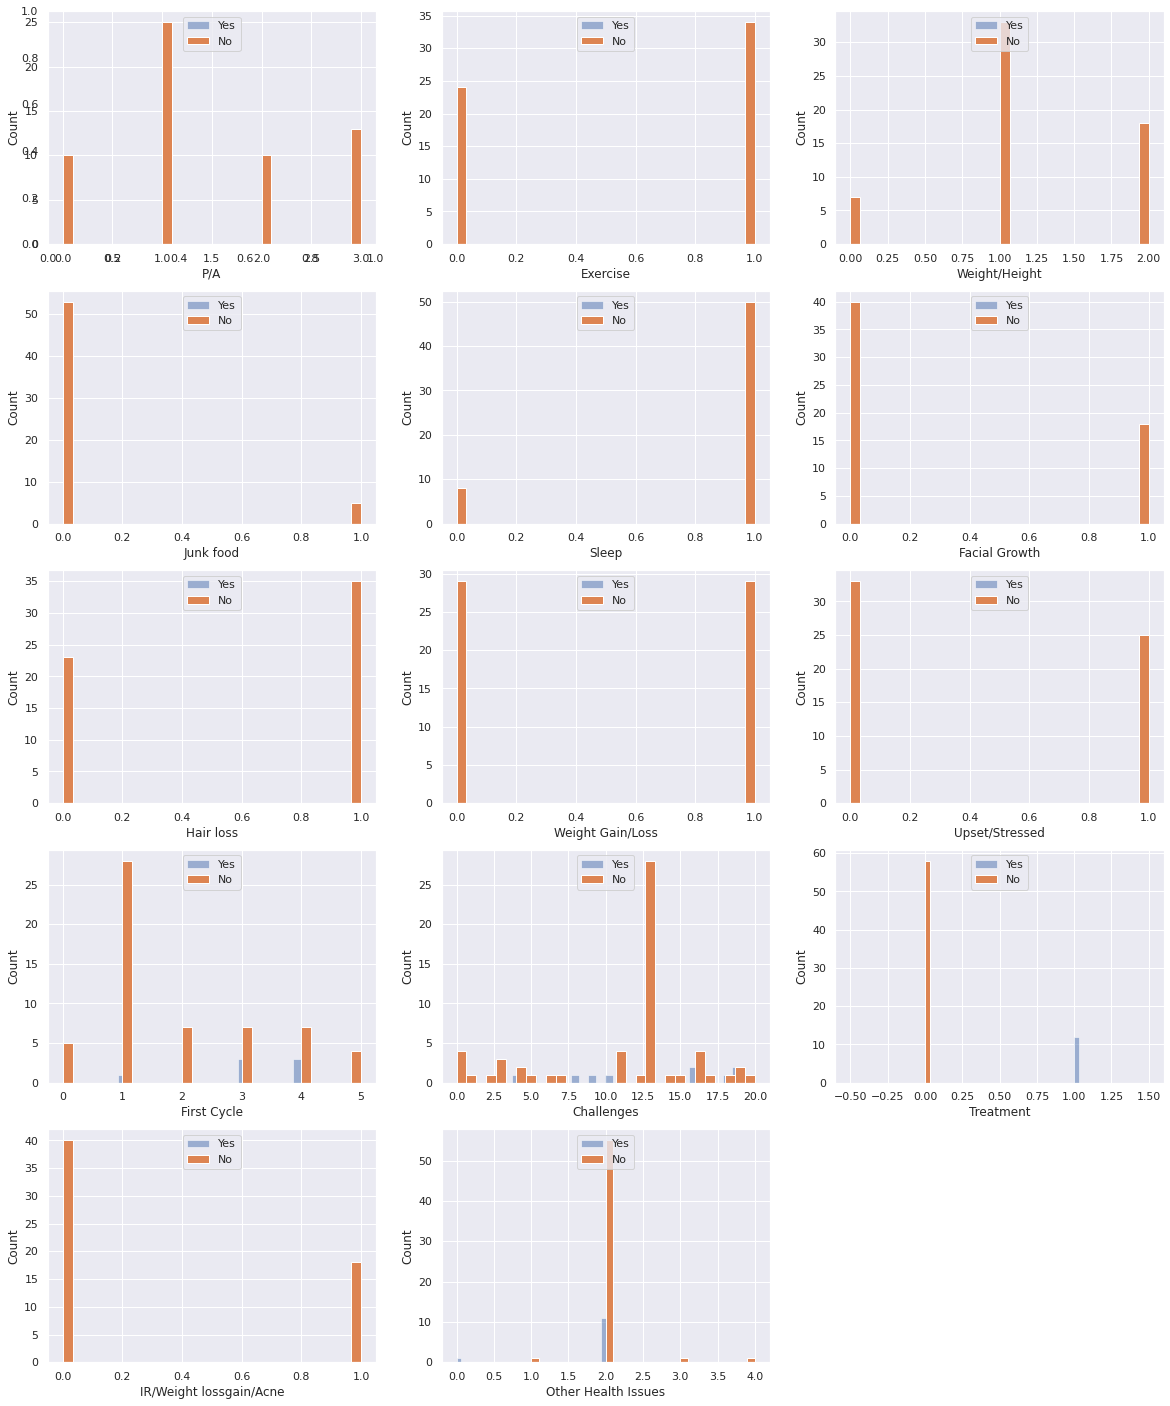

In [ ]:
fig, axes = plt.subplots(6, 3, figsize=(20, 30))

c = 1
for idx, (colName, ax)  in enumerate(list(zip(data.columns, axes.flatten()))):
    features = ['P/A', 'Exercise', 'Weight/Height', 'Junk food', 'Sleep',
       'Facial Growth', 'Hair loss', 'Weight Gain/Loss', 'Upset/Stressed',
       'First Cycle', 'Challenges', 'Treatment', 'IR/Weight lossgain/Acne',
       'Other Health Issues',]
    if colName in features:
        
        pos = data[data['Treatment'] == 1][colName]
        neg = data[data['Treatment'] == 0][colName]
        
        ax = fig.add_subplot(6, 3, c)
        ax.set_xlabel(colName,fontsize=12)
        ax.set_ylabel('Count')
        ax.set_title="{} PCOS/Not PCOS".format(colName)
        
        
        pos.hist(alpha = 0.5, bins=30, label='Yes')
        
        ax = fig.add_subplot(6, 3, c)
        neg.hist(alpha = 1, bins=30, label='No')
        ax.legend(loc=9)
        c += 1
    else:
        [ax.set_visible(False) for ax in axes.flatten()[idx+1:]]

In [ ]:
train, test = train_test_split(one_hot_data, test_size =0.25,random_state=10)

In [ ]:
train.shape

(52, 14)

In [ ]:
test.shape

(18, 14)

In [ ]:
c1 = DecisionTreeClassifier(min_samples_split=10)

In [ ]:
features = ['P/A', 'Exercise', 'Weight/Height', 'Junk food', 'Sleep',
       'Facial Growth', 'Hair loss', 'Weight Gain/Loss', 'Upset/Stressed',
       'First Cycle', 'Challenges', 'Treatment', 'IR/Weight lossgain/Acne',
       'Other Health Issues']

In [ ]:
X_train = train[features]
y_train = train['Treatment']

X_test = test[features]
y_test = test['Treatment']

In [ ]:
tree1 = c1.fit(X_train, y_train)

In [ ]:
y_pred_t1 = c1.predict(X_train)

In [ ]:
y_pred1 = c1.predict(X_test)

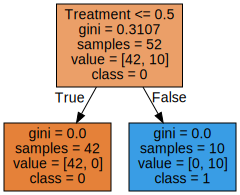

In [ ]:
dot_data = tree.export_graphviz(tree1,feature_names = X_train.columns,class_names=["0","1"], filled=True, precision=4)
graph = graphviz.Source(dot_data, format="png") 
graph

In [ ]:
sat_train_score_1 = accuracy_score(y_train, y_pred_t1)*100

In [ ]:
sat_test_score_1 = accuracy_score(y_test, y_pred1)*100
sat_test_score_1

100.0

In [ ]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00         2

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



In [ ]:
cm1 = confusion_matrix(y_test, y_pred1)

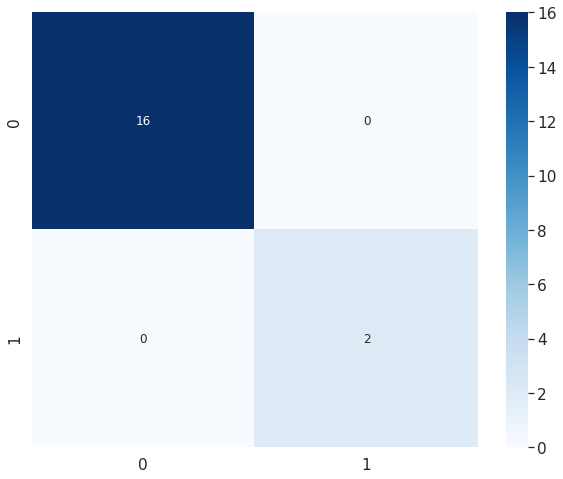

In [ ]:
df_cm1 = pd.DataFrame(cm1, range(2), range(2))
sns.set(font_scale=1.4) 
sns.heatmap(df_cm1, annot=True, cmap='Blues', annot_kws={"size": 12}, fmt='g') # font size
plt.show()

In [ ]:
model1 = tree1.predict_proba(X_train)

In [ ]:
model1_test = tree1.predict_proba(X_test)

In [ ]:
!pip install scikit-plot

<Figure size 504x504 with 0 Axes>

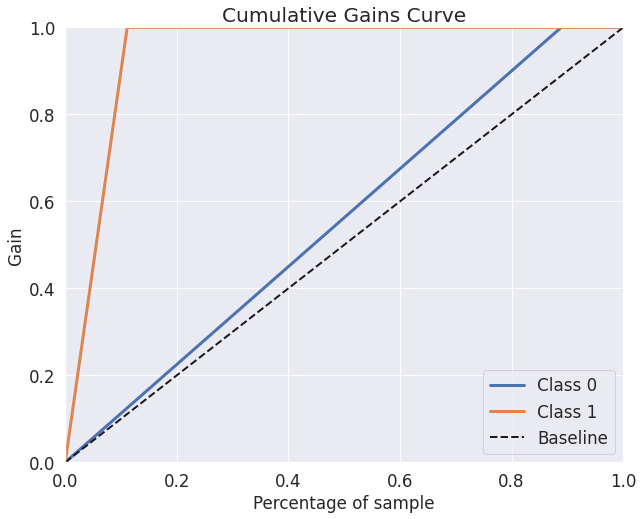

In [ ]:
import scikitplot as skplt
plt.figure(figsize=(7,7))
skplt.metrics.plot_cumulative_gain(y_test, model1_test)
plt.show()

In [ ]:
rf1 = RandomForestClassifier(max_depth=4, n_estimators = 20)
rf1.fit(X_train,y_train)

RandomForestClassifier(max_depth=4, n_estimators=20)

In [ ]:
rf1_model_pred = rf1.predict(X_test)

In [ ]:
rf1_model_pred

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
sat_test_score_rf = accuracy_score(y_test, rf1_model_pred)*100
sat_test_score_rf

100.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00         2

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



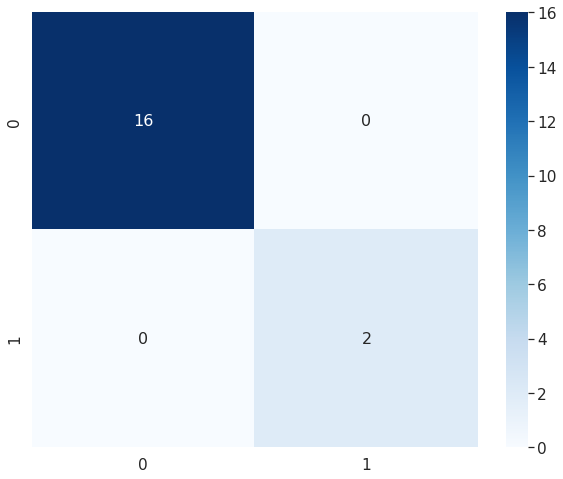

In [ ]:
rd = print(classification_report(y_test, rf1_model_pred))
rf_cm = confusion_matrix(y_test, rf1_model_pred)
df_cm3 = pd.DataFrame(rf_cm, range(2), range(2))
sns.set(font_scale=1.4) 
sns.heatmap(df_cm3, annot=True, cmap='Blues', annot_kws={"size": 16}, fmt='g') 
plt.show()

###Plotting Accuracy Graph of All Algo

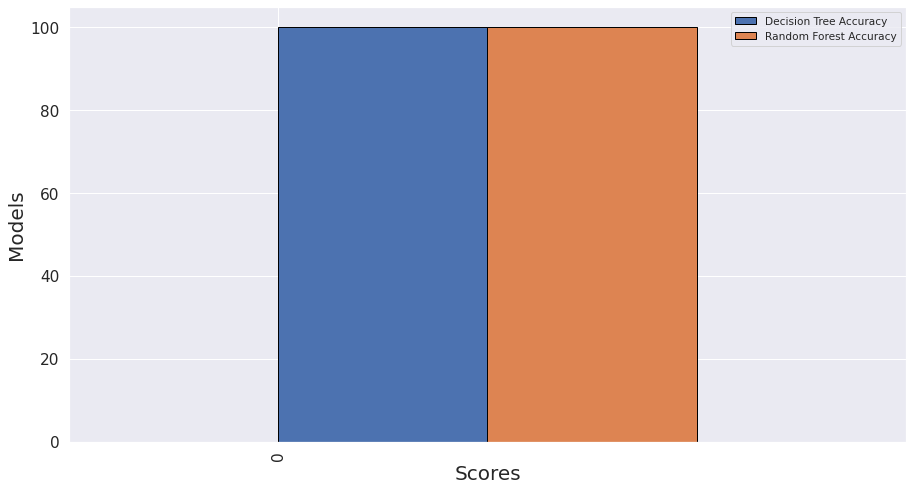

In [ ]:
modelacc = pd.DataFrame({"Decision Tree Accuracy ": [sat_test_score_1],
                               "Random Forest Accuracy": [sat_test_score_rf]})
modelacc.plot.bar(align='edge',figsize=(15,8),ec="black");
plt.xlabel('Scores', fontsize=20)
plt.ylabel('Models',fontsize=20)
plt.legend(fontsize=10.5);

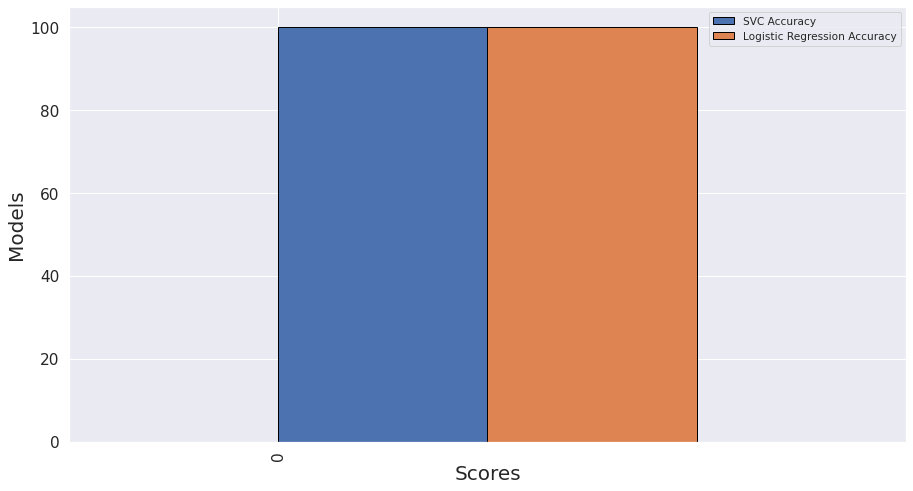

In [ ]:
modelacc = pd.DataFrame({"SVC Accuracy ": [sat_test_score_1],
                               "Logistic Regression Accuracy": [sat_test_score_rf]})
modelacc.plot.bar(align='edge',figsize=(15,8),ec="black");
plt.xlabel('Scores', fontsize=20)
plt.ylabel('Models',fontsize=20)
plt.legend(fontsize=10.5);

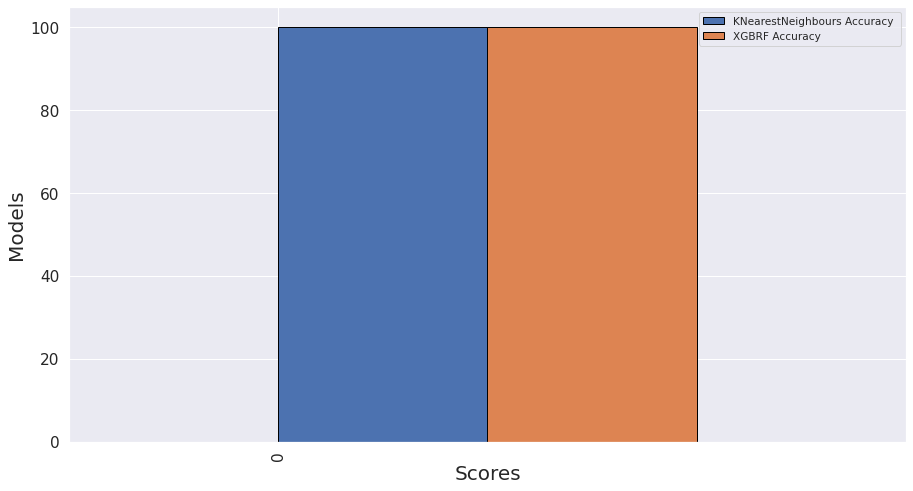

In [ ]:
modelacc = pd.DataFrame({"KNearestNeighbours Accuracy ": [sat_test_score_1],
                               "XGBRF Accuracy": [sat_test_score_rf]})
modelacc.plot.bar(align='edge',figsize=(15,8),ec="black");
plt.xlabel('Scores', fontsize=20)
plt.ylabel('Models',fontsize=20)
plt.legend(fontsize=10.5);

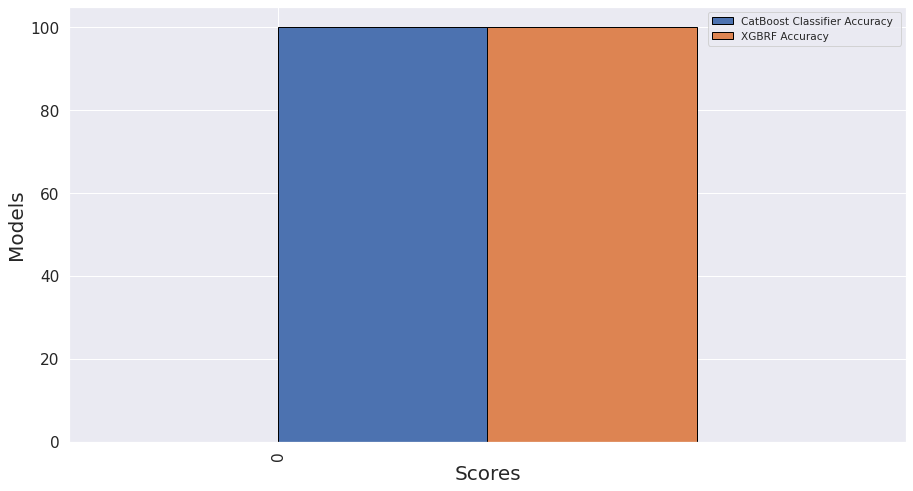

In [ ]:
modelacc = pd.DataFrame({"CatBoost Classifier Accuracy ": [sat_test_score_1],
                               "XGBRF Accuracy": [sat_test_score_rf]})
modelacc.plot.bar(align='edge',figsize=(15,8),ec="black");
plt.xlabel('Scores', fontsize=20)
plt.ylabel('Models',fontsize=20)
plt.legend(fontsize=10.5);